<a href="https://colab.research.google.com/github/PrateekSinghh/Wash_Trading_Case_Study_Project/blob/main/Wash_Trading_Sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/NEAR_token_transaction_data.xlsx")

In [ ]:
df.sample(10)

Transaction Hash   Blockno  \
5192   0xb5e3a618e0c8a57bd4f730c1b89981f31e30f6106a75...  19473652   
14681  0xfb251c58a1afb09df1c6b987f240f128594e615023c1...  19931701   
5497   0x7c9f35dd00986f9d57bb2b32d231476d5914faebc575...  19494532   
1160   0xca5512d26caefef899c1bba4b9c041463e448bcb45c5...  19057396   
8094   0x3f0eadc7b0a907e8032944b72c33f19e58442d9af9c2...  19643814   
18717  0x4b5950b2a2f87677c80c16e4dd0daebe9023010ebe64...  20124294   
5146   0xd2eec6883bb7776cc7b50459ab37e10cd435106ef5c4...  19471428   
7117   0x73b2714fdad8278013a1adf80716a33fa9b8b279dd3f...  19581194   
12358  0x777ff63c37a5869c1d58201597f99084f4a323902153...  19836131   
17759  0x452f4013c9b9afef3a7e57dea900ef7820587826390c...  20078648   

       UnixTimestamp      DateTime (UTC)  \
5192      1710910319 2024-03-20 04:51:59   
14681     1716456659 2024-05-23 09:30:59   
5497      1711163387 2024-03-23 03:09:47   
1160      1705866731 2024-01-21 19:52:11   
8094      1712976935 2024-04-13 02:55:35   
18717     1718782091 2024-06-19 07:28:11   
5146      1710883223 2024-03-19 21:20:23   
7117      1712219111 2024-04-04 08:25:11   
12358     1715301719 2024-05-10 00:41:59   
17759     1718230295 2024-06-12 22:11:35   

                                             From  \
5192   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
14681  0xe37e799d5077682fa0a244d46e5649f71457bd09   
5497   0x6469b34a2a4723163c4902dbbdea728d20693c12   
1160   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
8094   0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
18717  0xe37e799d5077682fa0a244d46e5649f71457bd09   
5146   0x1111111254eeb25477b68fb85ed929f73a960582   
7117   0x6b75d8af000000e20b7a7ddf000ba900b4009a80   
12358  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
17759  0x0000000000000000000000000000000000000000   

                                               To    Quantity  \
5192   0x22f9dcf4647084d6c31b2765f6910cd85c178c18   95.053049   
14681  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  370.000000   
5497   0x1111111254eeb25477b68fb85ed929f73a960582  117.959410   
1160   0x22f9dcf4647084d6c31b2765f6910cd85c178c18   94.133879   
8094   0x22f9dcf4647084d6c31b2765f6910cd85c178c18    7.306990   
18717  0x382ffce2287252f930e1c8dc9328dac5bf282ba1    1.362591   
5146   0xd8ec5bbffaeaf691ecd3215a3e76bfd71d50ca50   32.399904   
7117   0x6469b34a2a4723163c4902dbbdea728d20693c12  109.432456   
12358  0x1111111254eeb25477b68fb85ed929f73a960582  276.309852   
17759  0x70115c798e36b18fa44b459d153eaa15cca46aad   49.575792   

                              Method  
5192                      0x415565b0  
14681                           Swap  
5497                            Swap  
1160                      0x415565b0  
8094                      0x415565b0  
18717                           Swap  
5146                            Swap  
7117                               -  
12358                           Swap  
17759  Finalise Near To Eth Transfer

In [ ]:
df.shape

(19836, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [ ]:
df.describe().T

count                           mean                  min  \
Blockno         19836.0                19684408.376084           18909018.0   
UnixTimestamp   19836.0              1713462542.953418         1704068735.0   
DateTime (UTC)    19836  2024-04-18 17:49:02.953417984  2024-01-01 00:25:35   
Quantity        19836.0                     377.944387                  0.0   

                                25%                  50%                  75%  \
Blockno                  19465974.0           19736657.5           19937545.0   
UnixTimestamp          1710817115.0         1714099703.0         1716527195.0   
DateTime (UTC)  2024-03-19 02:58:35  2024-04-26 02:48:23  2024-05-24 05:06:35   
Quantity                    3.21358            72.444861           293.678666   

                                max             std  
Blockno                  20171862.0   322060.528145  
UnixTimestamp          1719356675.0  3898955.715296  
DateTime (UTC)  2024-06-25 23:04:35             NaN  
Quantity                   750000.0     8007.345063

In [ ]:
df.isna().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
col = df.columns

In [ ]:
for i in col:
  print(i,df[i].nunique())

Transaction Hash 9787
Blockno 8427
UnixTimestamp 8427
DateTime (UTC) 8427
From 1823
To 3273
Quantity 13329
Method 88


In [ ]:
df['Method'].value_counts()

Method
Swap                        9427
0x415565b0                  3281
-                           2562
Execute                     1030
Sell To Uniswap              759
                            ... 
Withdraw                       1
Sell Shares                    1
Buy On Uniswap V2Fork          1
I Bribe2Much Z7650399733       1
Unoswap3                       1
Name: count, Length: 88, dtype: int64

In [ ]:
df[df["Method"] == "-"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579      -  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486      -  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579      -  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661      -  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301      -  
...                                           ...         ...    ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000      -  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000      -  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356      -  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356      -  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825      -  

[2562 rows x 8 columns]

In [ ]:
## Replacing "-" value with "Unknown"

df["Method"] = df["Method"].apply(lambda x: x.replace("-","Unknown"))

In [ ]:
df[df["Method"] == "Unknown"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity   Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579  Unknown  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486  Unknown  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579  Unknown  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661  Unknown  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301  Unknown  
...                                           ...         ...      ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000  Unknown  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000  Unknown  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356  Unknown  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356  Unknown  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825  Unknown  

[2562 rows x 8 columns]

# **EDA**

### **Quantity**

In [ ]:
import math

q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)

iqr = q3 - q1

lower_bound = max(0,q1 - 1.5 * iqr)

upper_bound = math.ceil(q3 + 1.5 * iqr)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")

Lower Bound: 0 
Upper Bound: 730


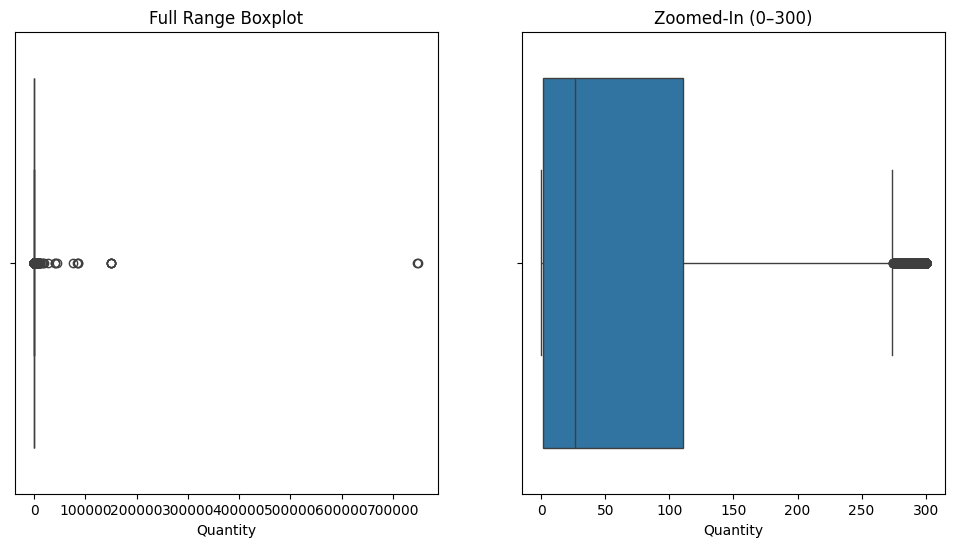

In [ ]:
plt.figure(figsize=(12, 6))

# Full range boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x = df["Quantity"])
plt.title('Full Range Boxplot')

# Zoomed-in boxplot for 75% data
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df["Quantity"] <= 300]["Quantity"])
plt.title('Zoomed-In (0–300)')

plt.show()

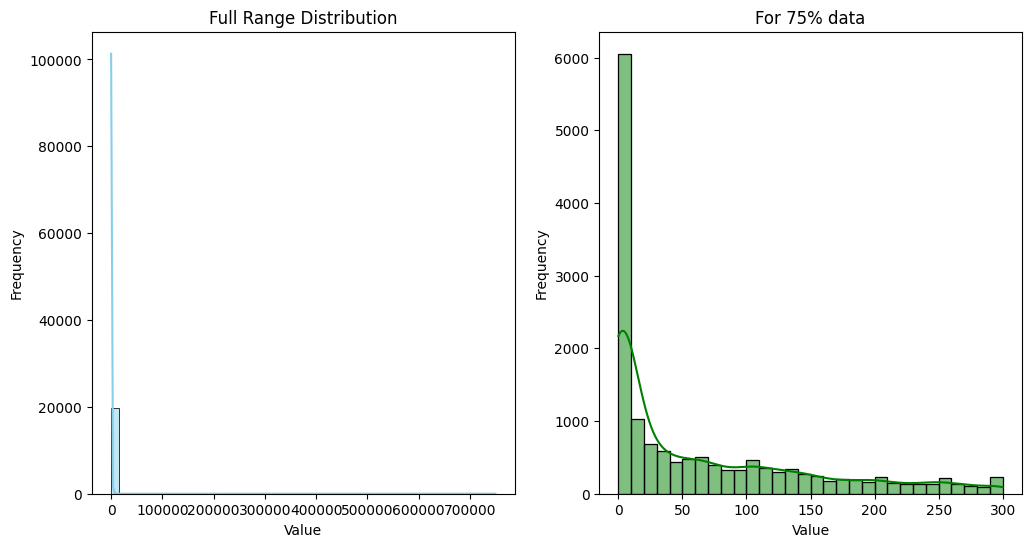

In [ ]:
plt.figure(figsize=(12, 6))

# Full range histogram
plt.subplot(1, 2, 1)
sns.histplot(x = df["Quantity"], bins=50, color='skyblue', edgecolor='black' , kde = True)
plt.title('Full Range Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Zoomed-in histogram for 75% data
plt.subplot(1, 2, 2)
sns.histplot(x=df[df["Quantity"] <= 300]["Quantity"], bins=30, color='green', kde=True)
plt.title('For 75% data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


**Outliers Analysis Using IQR**

In [ ]:
outliers = pd.DataFrame(df[(df["Quantity"] > upper_bound) | (df["Quantity"] < lower_bound)])

In [ ]:
outliers["Quantity"]

42        816.500000
48        810.034476
50        810.034476
76        991.532433
77        991.532433
            ...     
19706     758.799883
19707    1720.940369
19712     746.305913
19815     746.300000
19833    1198.366157
Name: Quantity, Length: 1686, dtype: float64

In [ ]:
print("Shape:",outliers.shape)
print("Minimum:",outliers["Quantity"].min())
print("Maximum",outliers["Quantity"].max())

Shape: (1686, 8)
Minimum: 731.0924444797905
Maximum 750000.0


**Outlier Analysis using Z-Score Method**

In [ ]:
from scipy.stats import zscore
df['Z-Score'] = zscore(df['Quantity'])
z_outliers = df[df['Z-Score'].abs() > 3]

In [ ]:
z_outliers["Quantity"]

1976      40000.000000
2034      40000.000000
6498      45200.000000
6649      26353.968605
14099     75170.000000
14108     84956.000000
14109     84956.000000
14110     84744.585000
14238    150000.000000
14239    150000.000000
14334    150000.000000
14335    150000.000000
14336    150000.000000
15829    750000.000000
15830    748125.000000
Name: Quantity, dtype: float64

In [ ]:
print("Shape:",z_outliers.shape)
print("Minimum:",z_outliers["Quantity"].min())
print("Maximum",z_outliers["Quantity"].max())

Shape: (15, 9)
Minimum: 26353.9686053412
Maximum 750000.0


### **Method**

In [ ]:
df["Method"].nunique()

88

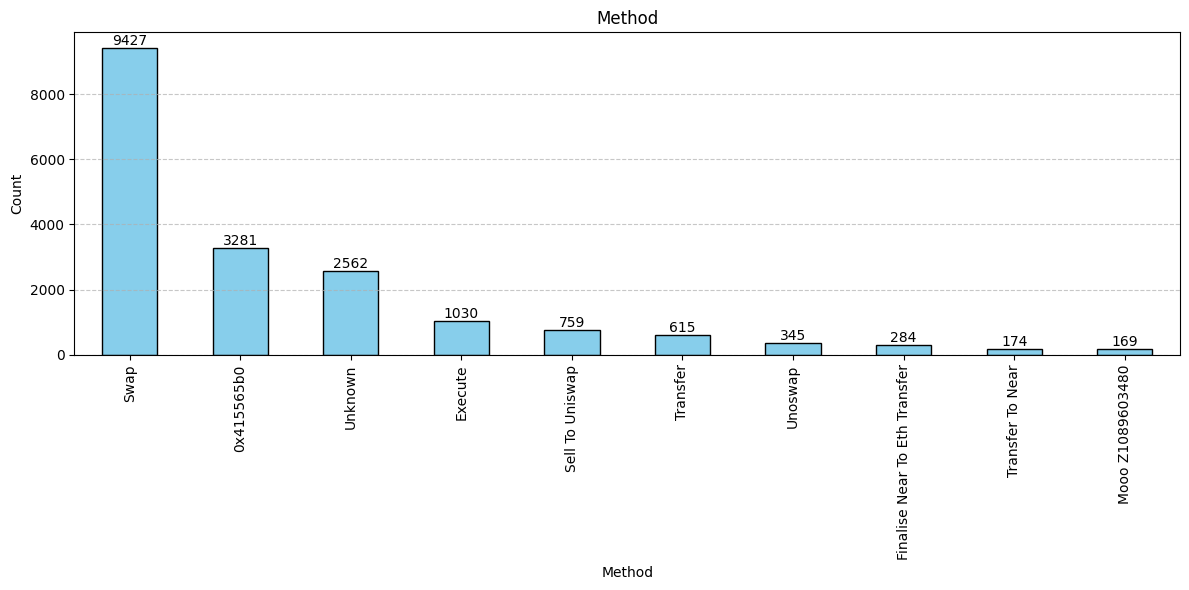

In [ ]:
plt.figure(figsize=(12, 6))
top_10 = df["Method"].value_counts().head(10)
top_10.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Method")
plt.xlabel("Method")
plt.ylabel("Count")
for i, count in enumerate(top_10):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **To column**

In [ ]:
###Check for the valid length of Ethereum Address

invalid_addresses = df[(df['To'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


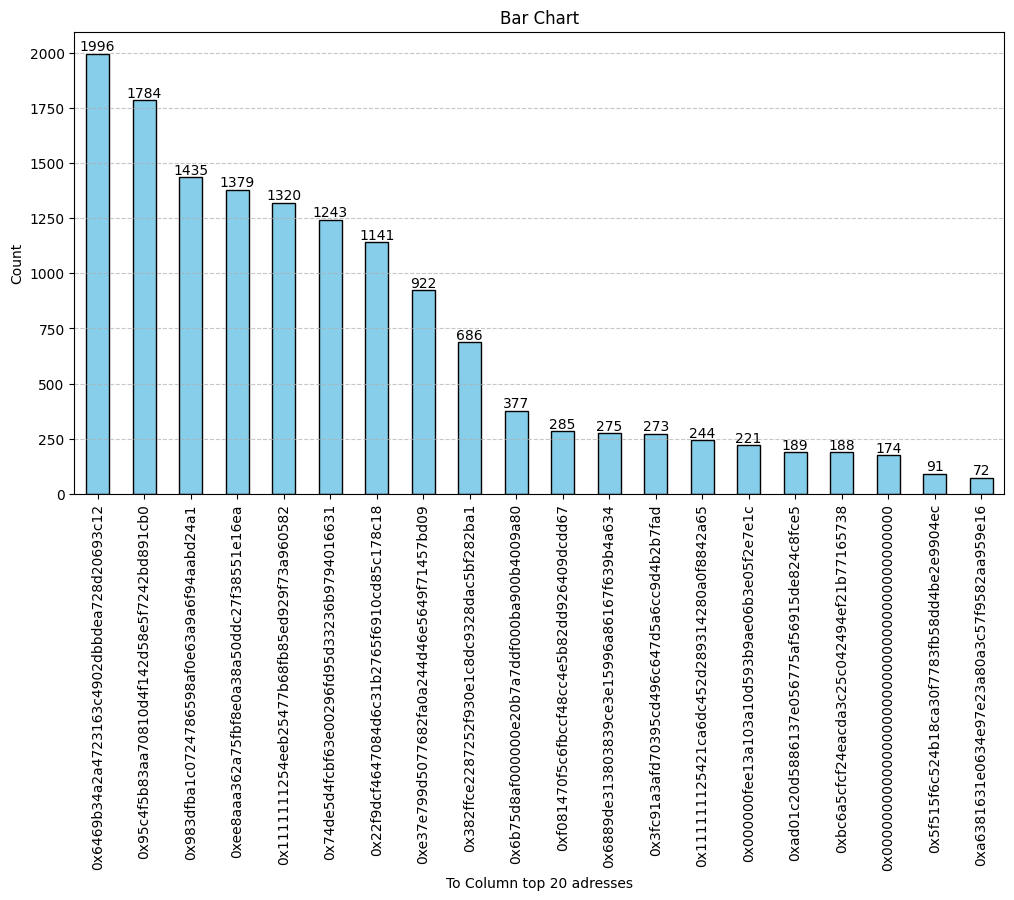

In [ ]:
plt.figure(figsize=(12, 6))
top_20_in_TO_col = df["To"].value_counts().head(20)
top_20_in_TO_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("To Column top 20 adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_in_TO_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **From column**

In [ ]:
### checking for the valid length of ethereum address
invalid_addresses = df[(df['From'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


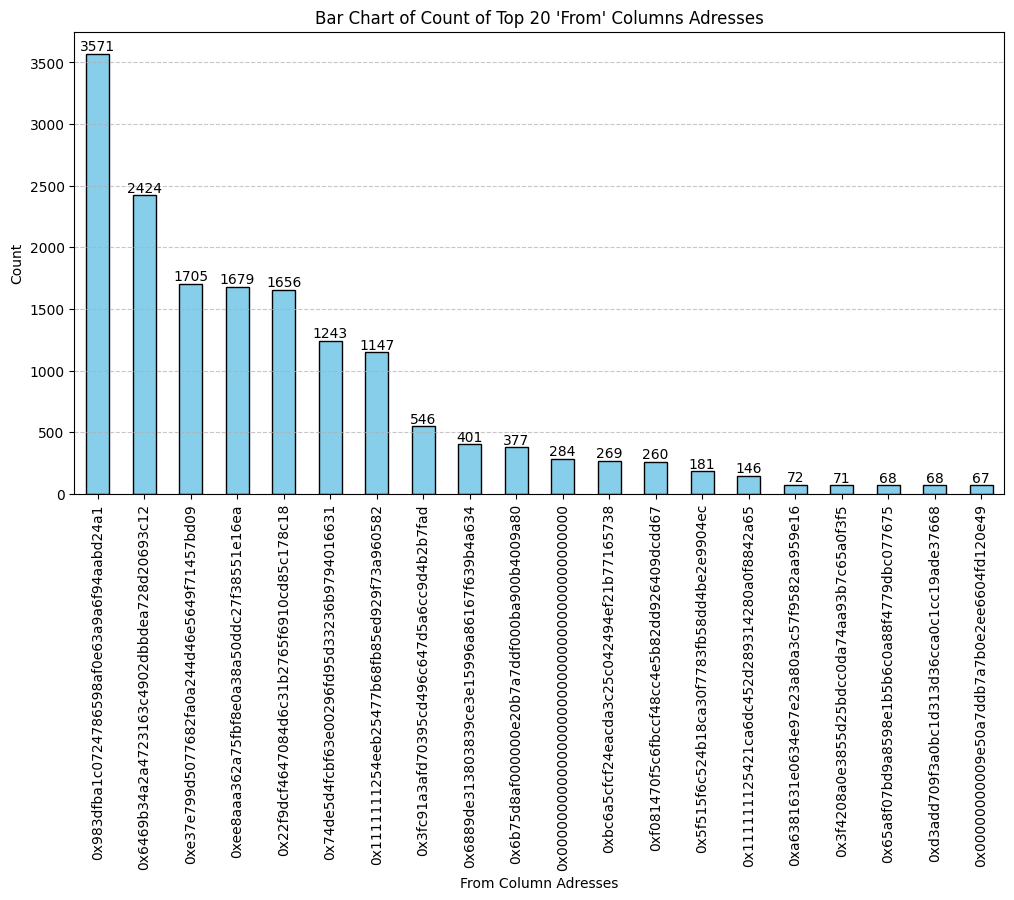

In [ ]:
plt.figure(figsize=(12, 6))
top_20_from_col = df["From"].value_counts().head(20)
top_20_from_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart of Count of Top 20 'From' Columns Adresses")
plt.xlabel("From Column Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_from_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Blockno**

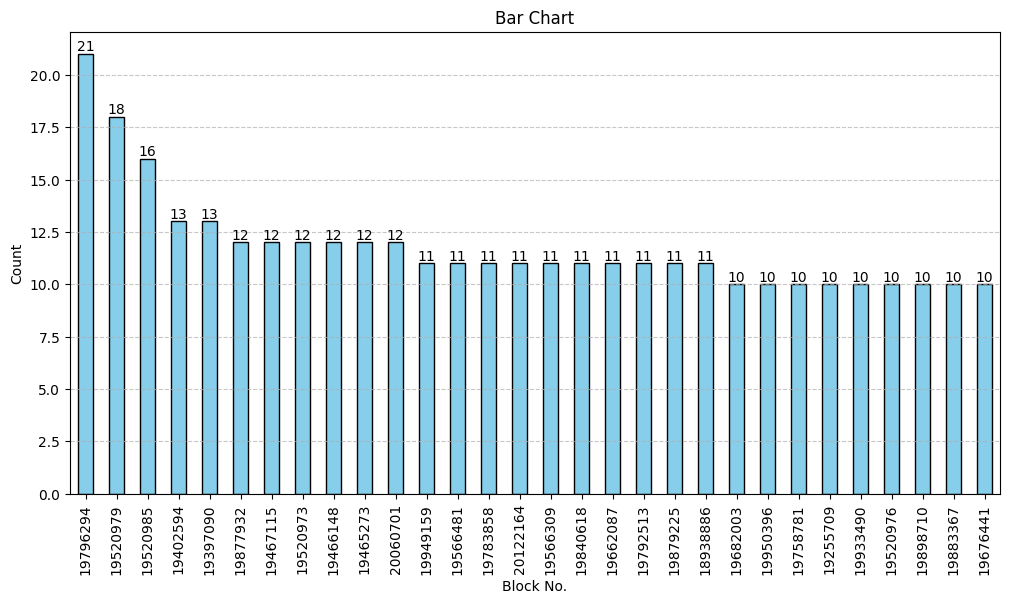

In [ ]:
plt.figure(figsize=(12, 6))
top_30_blocks = df["Blockno"].value_counts().head(30)
top_30_blocks.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Block No.")
plt.ylabel("Count")
for i, count in enumerate(top_30_blocks):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Transaction Hash**

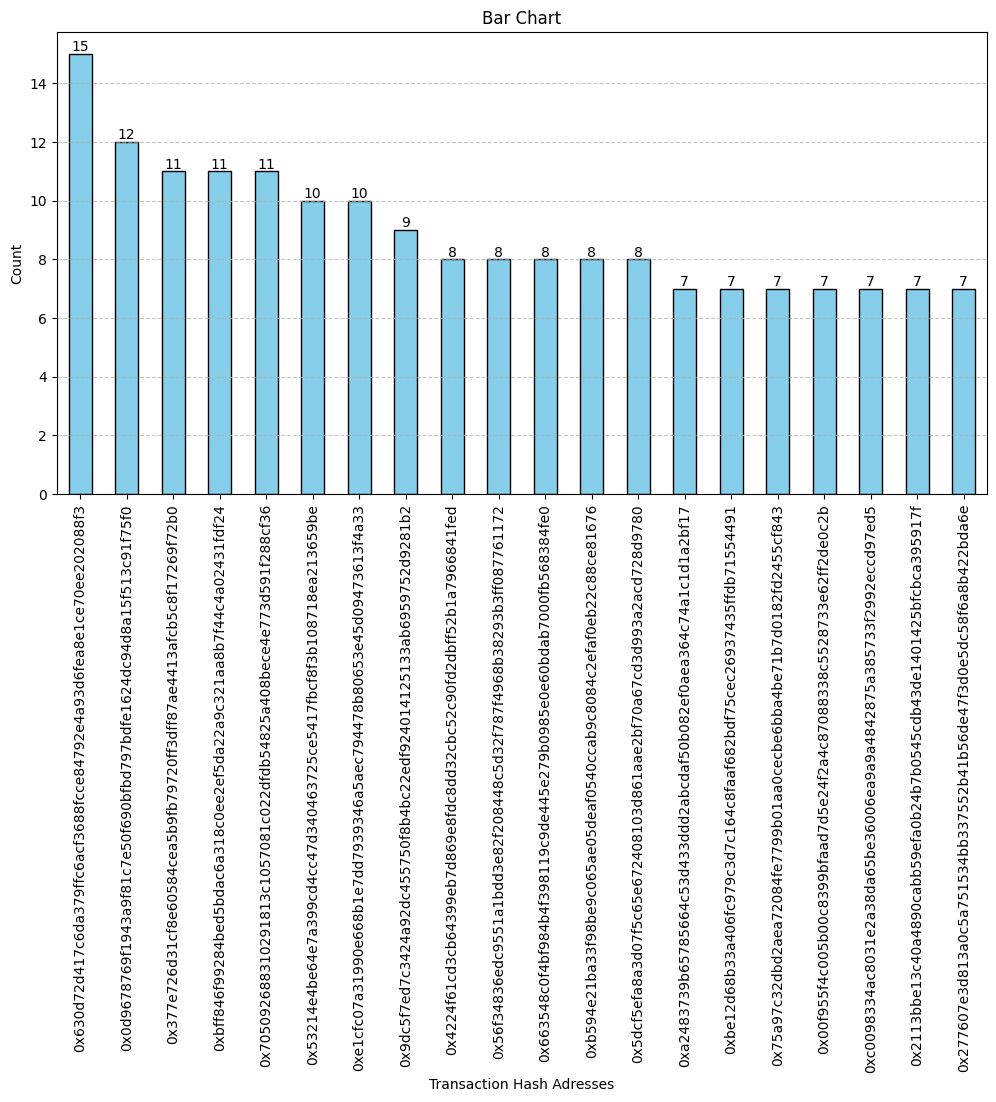

In [ ]:
plt.figure(figsize=(12, 6))
top_20_hash_transactions = df["Transaction Hash"].value_counts().head(20)
top_20_hash_transactions.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Transaction Hash Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_hash_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Bivariate Analysis**

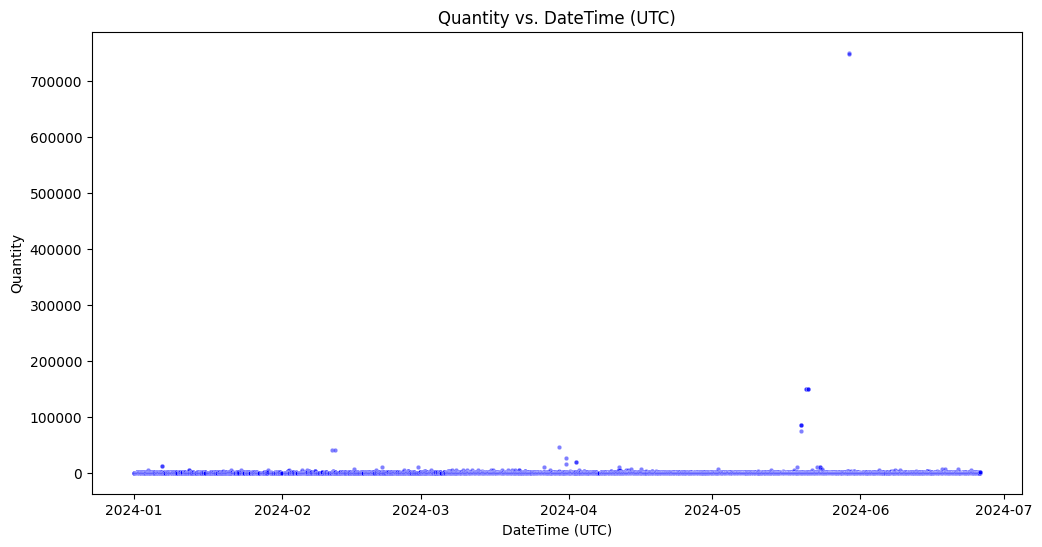

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df['DateTime (UTC)'], y =df['Quantity'], alpha=0.5, color='blue', s=10)
plt.title("Quantity vs. DateTime (UTC)")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

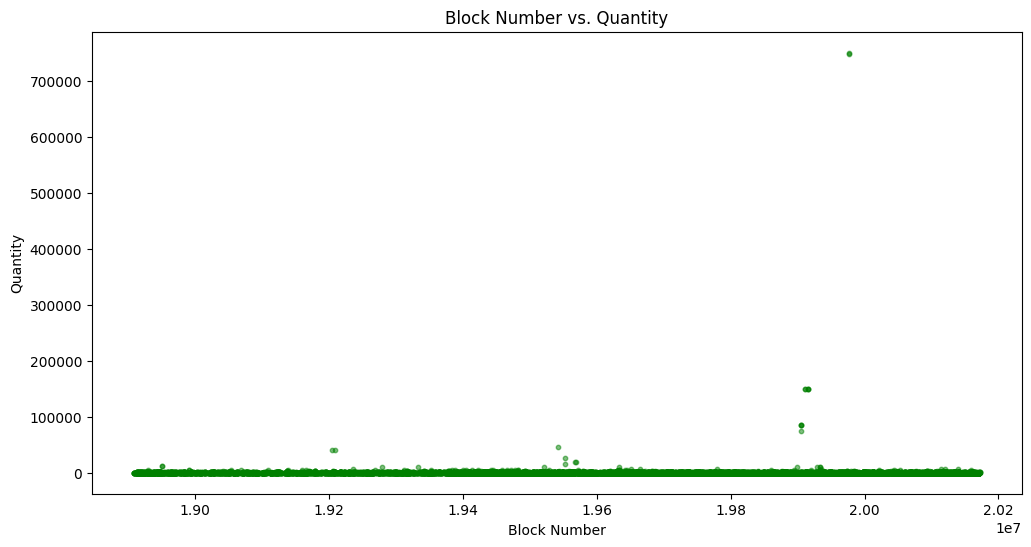

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Blockno'], df['Quantity'], alpha=0.5, color='green', s=10)
plt.title("Block Number vs. Quantity")
plt.xlabel("Block Number")
plt.ylabel("Quantity")
plt.show()


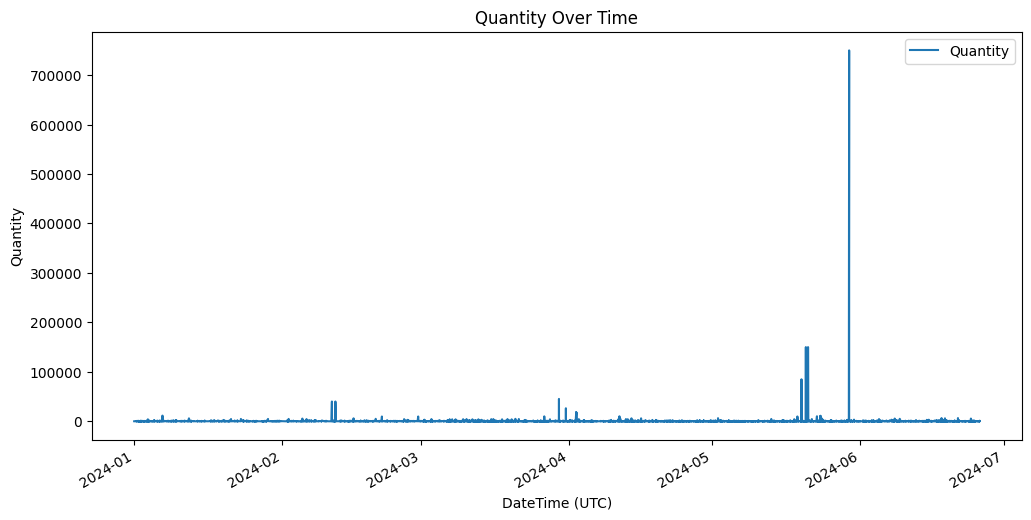

In [ ]:
df.sort_values('DateTime (UTC)').plot(x='DateTime (UTC)', y='Quantity', kind='line', figsize=(12, 6))
plt.title('Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()


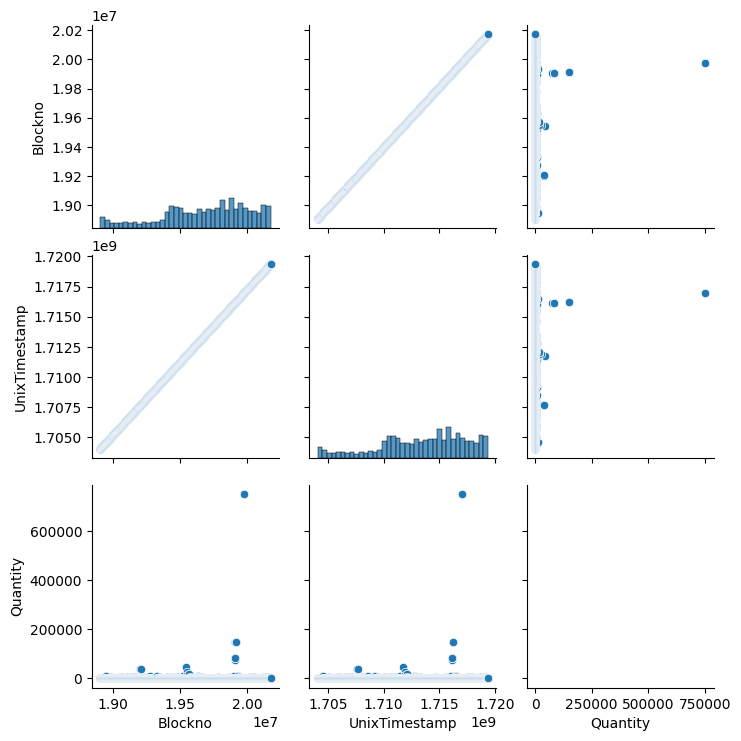

In [ ]:
sns.pairplot(df[['Blockno', 'UnixTimestamp', 'Quantity']])
plt.show()


# **Feature Engineering**

In [ ]:
data = df.copy()  ## making deep copy of df dataframe

In [ ]:
### Creating new features from DateTime column

def new_features_from_DateTime(df):
  data = df.assign(
    month=df["DateTime (UTC)"].dt.month,
    date=df["DateTime (UTC)"].dt.day,
    hour=df["DateTime (UTC)"].dt.hour,
    day_of_week=df["DateTime (UTC)"].dt.day_name(),
    is_weekend=(df["DateTime (UTC)"].dt.dayofweek >= 5).astype(int)
)
  return data

data = new_features_from_DateTime(df)


data.sample(5)


Transaction Hash   Blockno  \
315    0xb257e64e2059d264eafe4a6d16dd5eaf5b7a51466681...  18932269   
5839   0x8eb7b45d80a823042394b8fbf6e19cdc2cb90e9183b8...  19515497   
18103  0x1483ce7ee5d5c6c54e773d0831cafd77e076984585b3...  20098695   
7246   0xbcdd5af566514b831ba62abddf802ca3fda979fc3239...  19590507   
2649   0xb2231c9944692fe1f7af3cef4f81b4892f3e4f9751fe...  19313413   

       UnixTimestamp      DateTime (UTC)  \
315       1704350771 2024-01-04 06:46:11   
5839      1711418327 2024-03-26 01:58:47   
18103     1718472623 2024-06-15 17:30:23   
7246      1712331839 2024-04-05 15:43:59   
2649      1708970783 2024-02-26 18:06:23   

                                             From  \
315    0xb1900c48e614669ff257f6120f53244a4fcfe92c   
5839   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18103  0x6b75d8af000000e20b7a7ddf000ba900b4009a80   
7246   0x1111111254eeb25477b68fb85ed929f73a960582   
2649   0x74de5d4fcbf63e00296fd95d33236b9794016631   

                                               To    Quantity  \
315    0x6469b34a2a4723163c4902dbbdea728d20693c12   77.039135   
5839   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.463426   
18103  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  128.075607   
7246   0x6889de313803839ce3e15996a86167f639b4a634  942.803203   
2649   0x8baf1e1bfa3bbf196b8ade8d150d10427d636cc0  178.727782   

                Method   Z-Score  month  date  hour day_of_week  is_weekend  
315    Sell To Uniswap -0.037589      1     4     6    Thursday           0  
5839           Unknown -0.047151      3    26     1     Tuesday           0  
18103          Unknown -0.031217      6    15    17    Saturday           1  
7246              Swap  0.070515      4     5    15      Friday           0  
2649              Swap -0.024892      2    26    18      Monday           0

In [ ]:
# Define bins and labels based on the statistics of quantity column
bins = [0, 3.21358, 72.444861, 293.678666, 1000 , float('inf')]  # Min, 25%, 50%, 75%, Max
labels = ["Very Low", "Low", "Medium", "High" , "Very High"]

# Create a new column for Quantity categories
data["Quantity Category"] = pd.cut(data["Quantity"], bins=bins, labels=labels)

# Check the distribution
print(data["Quantity Category"].value_counts())


Quantity Category
Medium       4959
Low          4956
Very Low     4947
High         4224
Very High     735
Name: count, dtype: int64


In [ ]:
# Flag high quantity transactions
data["High Quantity Flag"] = (data["Quantity"] > 294).astype(int)  ### Here we take threshold as 75% quantile of the Quantity column

# Check if From and To addresses are the same (self-transaction)
data["Is Self Transaction"] = (data["From"] == data["To"]).astype(int)

In [ ]:
data.sample(10)

Transaction Hash   Blockno  \
16199  0xb00e0d4b19b733b79f84501dd631e49851b22a2e355c...  19993981   
11131  0x4ea83dfce0257c0aa8dff349be7e4651e0d03eab157a...  19795176   
16832  0x8e05e8f46a00466f83191433ca81bf9e79d7e6b1e8f2...  20023813   
11061  0x1591a54878ebc39ddd066be93b52f8b25b7824d56b30...  19792513   
16102  0xbaa23c425edc0da818c459b95bcc3b374233e4235368...  19989072   
3933   0x8bc5b561d97053c3021aec679c9718581956746d54a6...  19425532   
19016  0x15584be0b2737620897c12cf572f58955ebbf6dfea58...  20137597   
9079   0xd733bdc8b6a7bf6a82bb348d76fc8408f90df8439c6a...  19694894   
2866   0x19d02ed9a97dc7299166f1623e5ca9ebb8383d9ae70d...  19349461   
17370  0xd2bf0ad3e608071706bc031a6ff8c65622259e8c7764...  20056060   

       UnixTimestamp      DateTime (UTC)  \
16199     1717208855 2024-06-01 02:27:35   
11131     1714806827 2024-05-04 07:13:47   
16832     1717568627 2024-06-05 06:23:47   
11061     1714774655 2024-05-03 22:17:35   
16102     1717149527 2024-05-31 09:58:47   
3933      1710325427 2024-03-13 10:23:47   
19016     1718942771 2024-06-21 04:06:11   
9079      1713595151 2024-04-20 06:39:11   
2866      1709406347 2024-03-02 19:05:47   
17370     1717957751 2024-06-09 18:29:11   

                                             From  \
16199  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad   
11131  0x6469b34a2a4723163c4902dbbdea728d20693c12   
16832  0xe37e799d5077682fa0a244d46e5649f71457bd09   
11061  0x1111111254eeb25477b68fb85ed929f73a960582   
16102  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
3933   0xce6b989fc5c29765cf55f0adeed6372ed0c5c43d   
19016  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad   
9079   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2866   0x03c5e65b35fd2769c2255a7a0389d1c44b701c7f   
17370  0xd0e80a8ed653827910ffbfc65c556155443f2dea   

                                               To    Quantity  \
16199  0x000000fee13a103a10d593b9ae06b3e05f2e7e1c    0.060506   
11131  0x74de5d4fcbf63e00296fd95d33236b9794016631   22.572553   
16832  0x6469b34a2a4723163c4902dbbdea728d20693c12   68.074077   
11061  0x9a47d44d2329ade8b640ad7062fb57748d57e131  535.392798   
16102  0x35c84b82f16af67892d1364413a6f0ca51072175    6.602168   
3933   0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67  505.000000   
19016  0x000000fee13a103a10d593b9ae06b3e05f2e7e1c    0.245796   
9079   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.161913   
2866   0x5241d3206e7684ae9c83e7808d7a57d490bc8861   17.008243   
17370  0x325ebd84121ae38d3c32dc8e02a11556b51ac622    5.553230   

                                 Method   Z-Score  month  date  hour  \
16199                           Execute -0.047202      6     1     2   
11131                              Swap -0.044391      5     4     7   
16832                              Swap -0.038709      6     5     6   
11061                              Swap  0.019644      5     3    22   
16102  Remove Liquidity ETH With Permit -0.046385      5    31     9   
3933                               Swap  0.015849      3    13    10   
19016                           Execute -0.047178      6    21     4   
9079                               Swap -0.047189      4    20     6   
2866                      Transfer From -0.045085      3     2    19   
17370                          Transfer -0.046516      6     9    18   

      day_of_week  is_weekend Quantity Category  High Quantity Flag  \
16199    Saturday           1          Very Low                   0   
11131    Saturday           1               Low                   0   
16832   Wednesday           0               Low                   0   
11061      Friday           0              High                   1   
16102      Friday           0               Low                   0   
3933    Wednesday           0              High                   1   
19016      Friday           0          Very Low                   0   
9079     Saturday           1          Very Low                   0   
2866     Saturday           1               Low     

In [ ]:
# Flag outliers based on Z-Score (e.g., abs(Z-Score) > 3)
data["Is Outlier"] = (data["Z-Score"].abs() > 3).astype(int)


In [ ]:
data["Log Quantity"] = np.log1p(data["Quantity"])   ## For Handle Skewness in the Quantity colummn

In [ ]:
# Count transactions per address
data["From Activity Count"] = data["From"].map(data["From"].value_counts())
data["To Activity Count"] = data["To"].map(data["To"].value_counts())

# Count unique addresses
print(data["From"].nunique())
print(data["To"].nunique())


1823
3273


In [ ]:
# Sort by wallet and DateTime
data = data.sort_values(by=["From", "DateTime (UTC)"])

# Cumulative sum of Quantity per wallet
data["Cumulative Quantity"] = data.groupby("From")["Quantity"].cumsum()


In [ ]:
data.sample(10)

Transaction Hash   Blockno  \
3044   0x8e95914fe4947c122085f495d97fcb01e81e81ceec0f...  19377073   
4333   0x1eee6cf233d8638cebbeafec23eac0e68da4801f4ad8...  19443159   
1154   0x1847093d0e562b4f59d74de9345c11eb33745bf68e35...  19054813   
14694  0xb3eb2e8b57dc826af8c064a5a3fdbbfaecb9958a8d12...  19932147   
5353   0xabe9d4317c320d8ca6385778d40865c48f187f6f788f...  19483048   
1348   0xe46c725f6a02e3b008378b919381e716d75bf514aecb...  19089794   
6442   0x6768548ff05a15aea27f9a5c838957ad75c2e8bb8ec9...  19540375   
4225   0xec5800b782c4fb92043b8304547d880a66a1fe8856d5...  19438729   
13901  0x619b6d971d80c912ecb49085a260c8a1ddc64270f279...  19894059   
17092  0xf81a5fcba63ca02d22873748c25ec46baa8a1ca3c039...  20042756   

       UnixTimestamp      DateTime (UTC)  \
3044      1709739443 2024-03-06 15:37:23   
4333      1710539759 2024-03-15 21:55:59   
1154      1705835003 2024-01-21 11:03:23   
14694     1716462035 2024-05-23 11:00:35   
5353      1711024211 2024-03-21 12:30:11   
1348      1706260235 2024-01-26 09:10:35   
6442      1711723979 2024-03-29 14:52:59   
4225      1710486131 2024-03-15 07:02:11   
13901     1716001739 2024-05-18 03:08:59   
17092     1717797167 2024-06-07 21:52:47   

                                             From  \
3044   0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4333   0x74de5d4fcbf63e00296fd95d33236b9794016631   
1154   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
14694  0x74de5d4fcbf63e00296fd95d33236b9794016631   
5353   0x74de5d4fcbf63e00296fd95d33236b9794016631   
1348   0x6469b34a2a4723163c4902dbbdea728d20693c12   
6442   0x111111125421ca6dc452d289314280a0f8842a65   
4225   0x74de5d4fcbf63e00296fd95d33236b9794016631   
13901  0x1111111254eeb25477b68fb85ed929f73a960582   
17092  0xd42b0ecf8a9f8ba9db7b0c989d73cf0bd5f83b66   

                                               To     Quantity  \
3044   0x495a43b9aafcafaeec494943b3b0a16fa94b4b12  2000.288835   
4333   0xd5cd415a1693b7861563ec50c79e4bba8aaacfe1  1272.301727   
1154   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0     0.437821   
14694  0x6469b34a2a4723163c4902dbbdea728d20693c12     0.579075   
5353   0x60d475e17c77c1f54ddc10249b5da8bf7eca677a   410.181389   
1348   0xe67af34cc94eb48be6fb93ff038f38fd31d3ec9a    15.007216   
6442   0xbc6a5cfcf24eacda3c25c042494ef21b77165738   510.563420   
4225   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   141.250000   
13901  0x3f3a35f857f49638fafbc5f3ef63532e4fda65c3    24.576821   
17092  0x49866b3681ac8c910d095f858dc0a8d82685821b    93.484308   

                Method   Z-Score  month  ...  day_of_week  is_weekend  \
3044        0x415565b0  0.202560      3  ...    Wednesday           0   
4333              Swap  0.111659      3  ...       Friday           0   
1154              Swap -0.047154      1  ...       Sunday           1   
14694             Swap -0.047137      5  ...     Thursday           0   
5353              Swap  0.004009      3  ...     Thursday           0   
1348   Sell To Uniswap -0.045335      1  ...       Friday           0   
6442              Swap  0.016543      3  ...       Friday           0   
4225              Swap -0.029572      3  ...       Friday           0   
13901             Swap -0.044140      5  ...     Saturday           1   
17092          Unknown -0.035536      6  ...       Friday           0   

      Quantity Category  High Quantity Flag Is Self Transaction  Is Outlier  \
3044          Very High                   1                   0           0   
4333          Very High                   1                   0           0   
1154           Very Low                   0                   0           0   
14694          Very Low                   0                   0           0   
5353               High                   1                   0           0   
1348                Low                   0                   0           0   
6442               High                   1                   0           0   
4225             Medium              

**Network analysis**

In [ ]:
import networkx as nx
import pandas as pd


In [ ]:
#Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Calculate centralities
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Map centralities back to the DataFrame
# Create new columns in the DataFrame to store centrality measures for 'From' nodes
data['from_degree_centrality'] = data['From'].map(degree_centrality)
data['from_betweenness_centrality'] = data['From'].map(betweenness_centrality)
data['from_closeness_centrality'] = data['From'].map(closeness_centrality)

# Similarly, create columns for 'To' nodes
data['to_degree_centrality'] = data['To'].map(degree_centrality)
data['to_betweenness_centrality'] = data['To'].map(betweenness_centrality)
data['to_closeness_centrality'] = data['To'].map(closeness_centrality)



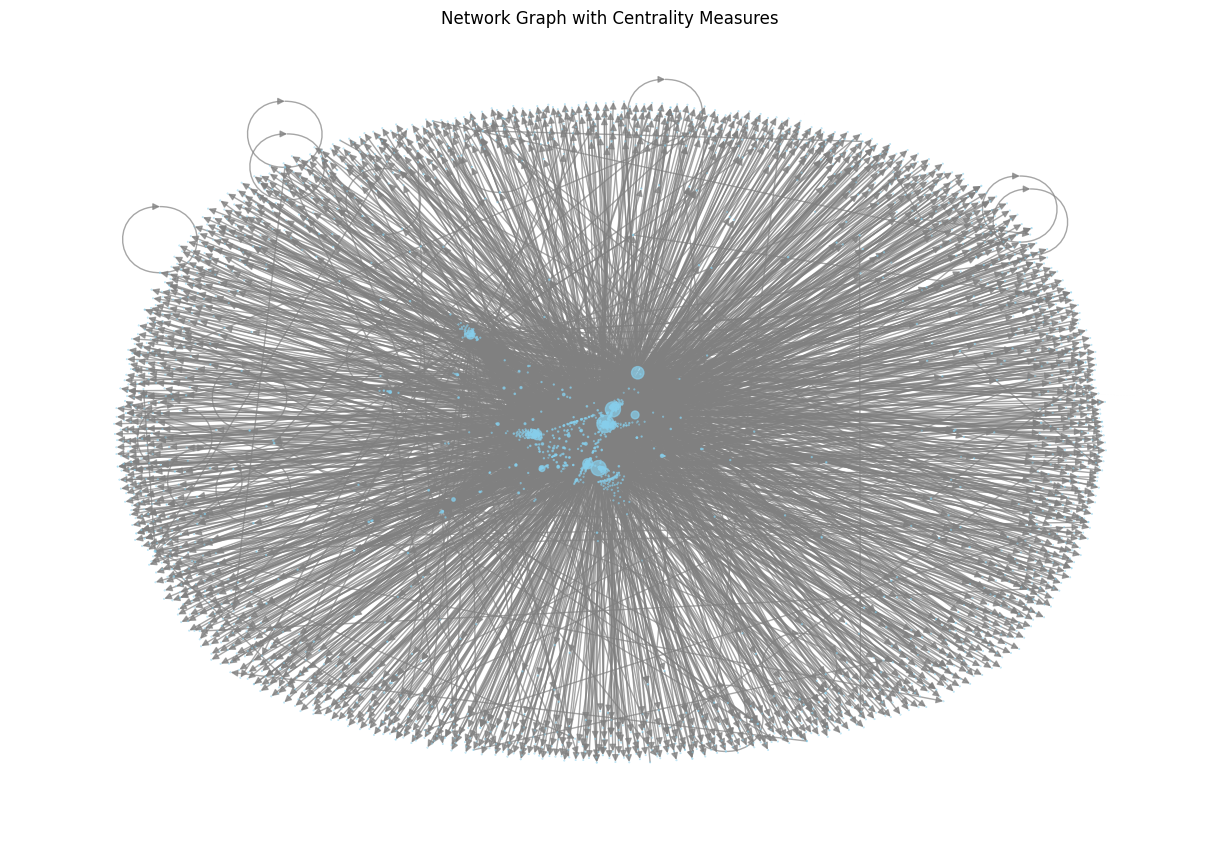

In [ ]:
# Ensure the DataFrame has the feature-engineered columns, including 'From' and 'To'

# Step 1: Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Step 2: Visualize the graph
plt.figure(figsize=(12, 8))

# Draw the network
# Node size is proportional to degree centrality
node_sizes = [500 * nx.degree_centrality(G)[node] for node in G.nodes()]
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]  # Scale for visualizing edge weights

# Using a spring layout for better spacing of nodes
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    node_color='skyblue',
    edge_color='gray',
    width=1.0,
    alpha=0.7,
    font_size=10
)

# Display the plot
plt.title("Network Graph with Centrality Measures")
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Assuming 'G' is your networkx graph and 'data' is your DataFrame

# 1. Create node positions for visualization
pos = nx.spring_layout(G)  # You can experiment with other layout algorithms

# 2. Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# 3. Create node traces
node_x = []
node_y = []
node_text = []  # To display node information on hover
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Address: {node}<br>Degree: {G.degree(node)}")
    # Customize hover text with relevant information

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # Choose a colorscale
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# 4. Color nodes based on degree centrality (or other metrics)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"Address: {adjacencies[0]}<br>Degree: {len(adjacencies[1])}") # Customize hover text

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# 5. Create the figure and add traces
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='NEAR Token Transaction Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

**Analysis of data**

In [ ]:
data.sample(5)

Transaction Hash   Blockno  \
14819  0x72e14971b520467b3e23108686c8a68bce7296616a8c...  19935494   
19769  0xd3cec873cd9ebc02276bb89bba6cf878bf77e41a5315...  20168573   
14632  0x84062a28d74945413531c094184344026b5f9167b3dc...  19929289   
11457  0xeb626f6f782e3b94e12e6c1b6576d67c24f871419146...  19804543   
3817   0x0c5201106bbc83f4b001fdd94a85877ebb4d17414e87...  19421663   

       UnixTimestamp      DateTime (UTC)  \
14819     1716502463 2024-05-23 22:14:23   
19769     1719317003 2024-06-25 12:03:23   
14632     1716427535 2024-05-23 01:25:35   
11457     1714919927 2024-05-05 14:38:47   
3817      1710278627 2024-03-12 21:23:47   

                                             From  \
14819  0x1111111254eeb25477b68fb85ed929f73a960582   
19769  0xd91b4d49de2ac31e315fb8ff28d0e80309843b3b   
14632  0x74de5d4fcbf63e00296fd95d33236b9794016631   
11457  0x3b1745b48382e28b99ec73a21ab358c215d87b05   
3817   0xbbe14b62a90bc3bb655f2a9ca59fa6ab9c062f03   

                                               To      Quantity Method  \
14819  0x331100e0bde4bf08da69816f6be6843dcc353d6a  3.781270e+00   Swap   
19769  0x74de5d4fcbf63e00296fd95d33236b9794016631  2.352400e-15   Swap   
14632  0x15dd45c70e54fe25312cc4279e058b3cdf4b6cbc  1.167289e+02   Swap   
11457  0xe37e799d5077682fa0a244d46e5649f71457bd09  7.236112e+00   Swap   
3817   0x983dfba1c0724786598af0e63a9a6f94aabd24a1  6.979584e+02   Swap   

        Z-Score  month  ...  Log Quantity  From Activity Count  \
14819 -0.046737      5  ...  1.564706e+00                 1147   
19769 -0.047209      6  ...  2.352400e-15                   11   
14632 -0.032634      5  ...  4.768385e+00                 1243   
11457 -0.046306      5  ...  2.108528e+00                    1   
3817   0.039943      3  ...  6.549591e+00                    1   

      To Activity Count  Cumulative Quantity from_degree_centrality  \
14819                 5         2.725279e+05               0.157610   
19769              1243         3.154592e-15               0.002845   
14632                 1         1.146511e+05               0.234993   
11457               922         7.236112e+00               0.000569   
3817               1435         6.979584e+02               0.000569   

       from_betweenness_centrality  from_closeness_centrality  \
14819                     0.066913                   0.176537   
19769                     0.001029                   0.141320   
14632                     0.140243                   0.205530   
11457                     0.000000                   0.143179   
3817                      0.000000                   0.127003   

       to_degree_centrality  to_betweenness_centrality  \
14819              0.000569                   0.000000   
19769              0.234993                   0.140243   
14632              0.000284                   0.000000   
11457              0.096444                   0.069457   
3817               0.034708                   0.019162   

       to_closeness_centrality  
14819                 0.151067  
19769                 0.205530  
14632                 0.141442  
11457                 0.213470  
3817                  0.212838  

[5 rows x 28 columns]

In [ ]:
data.isnull().sum()

Transaction Hash               0
Blockno                        0
UnixTimestamp                  0
DateTime (UTC)                 0
From                           0
To                             0
Quantity                       0
Method                         0
Z-Score                        0
month                          0
date                           0
hour                           0
day_of_week                    0
is_weekend                     0
Quantity Category              8
High Quantity Flag             0
Is Self Transaction            0
Is Outlier                     0
Log Quantity                   0
From Activity Count            0
To Activity Count              0
Cumulative Quantity            0
from_degree_centrality         0
from_betweenness_centrality    0
from_closeness_centrality      0
to_degree_centrality           0
to_betweenness_centrality      0
to_closeness_centrality        0
dtype: int64

In [ ]:
data.describe()

Blockno  UnixTimestamp                 DateTime (UTC)  \
count  1.982900e+04   1.982900e+04                          19829   
mean   1.968449e+07   1.713463e+09  2024-04-18 18:04:37.185889536   
min    1.890902e+07   1.704069e+09            2024-01-01 00:25:35   
25%    1.946602e+07   1.710818e+09            2024-03-19 03:07:35   
50%    1.973678e+07   1.714101e+09            2024-04-26 03:12:11   
75%    1.993754e+07   1.716527e+09            2024-05-24 05:06:35   
max    2.017186e+07   1.719357e+09            2024-06-25 23:04:35   
std    3.220912e+05   3.899327e+06                            NaN   

            Quantity       Z-Score         month          date          hour  \
count   19829.000000  1.982900e+04  19829.000000  19829.000000  19829.000000   
mean      378.076434  7.166703e-18      4.092642     15.548590     11.957386   
min         0.000000 -4.720908e-02      1.000000      1.000000      0.000000   
25%         3.214500 -4.680770e-02      3.000000      8.000000      5.000000   
50%        72.480398 -3.815871e-02      4.000000     16.000000     13.000000   
75%       293.707990 -1.053479e-02      5.000000     23.000000     18.000000   
max    750000.000000  9.360266e+01      6.000000     31.000000     23.000000   
std      8008.755294  1.000025e+00      1.472990      8.428048      7.158446   

         is_weekend  High Quantity Flag  ...  Log Quantity  \
count  19829.000000        19829.000000  ...  19829.000000   
mean       0.288416            0.249634  ...      3.754155   
min        0.000000            0.000000  ...      0.000000   
25%        0.000000            0.000000  ...      1.438531   
50%        0.000000            0.000000  ...      4.297019   
75%        1.000000            0.000000  ...      5.685985   
max        1.000000            1.000000  ...     13.527830   
std        0.453037            0.432812  ...      2.335075   

       From Activity Count  To Activity Count  Cumulative Quantity  \
count         19829.000000       19829.000000         1.982900e+04   
mean           1557.523577         891.534974         1.713366e+05   
min               1.000000           1.000000         0.000000e+00   
25%             284.000000          21.000000         1.924989e+04   
50%            1656.000000        1141.000000         1.308461e+05   
75%            2424.000000        1435.000000         2.720136e+05   
max            3571.000000        1996.000000         1.271448e+06   
std            1223.679990         725.054807         1.728831e+05   

       from_degree_centrality  from_betweenness_centrality  \
count            19829.000000                 19829.000000   
mean                 0.107344                     0.093251   
min                  0.000284                     0.000000   
25%                  0.006543                     0.002834   
50%                  0.070555                     0.045942   
75%                  0.234993                     0.140243   
max                  0.302418                     0.373287   
std                  0.106420                     0.117655   

       from_closeness_centrality  to_degree_centrality  \
count               19829.000000          19829.000000   
mean                    0.190616              0.085831   
min                     0.000000              0.000284   
25%                     0.162960              0.000853   
50%                     0.209364              0.011949   
75%                     0.213470              0.157610   
max                     0.234901              0.302418   
std                     0.042788              0.107410   

       to_betweenness_centrality  to_closeness_centrality  
count               19829.000000             19829.000000  
mean                    0.074212                 0.177432  
min                     0.000000                 0.000000  
25%                     0.000000                 0.144766  
50%                     0.019162                 0.176537  
75%                     0.114195     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19829 entries, 13 to 10613
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19829 non-null  object        
 1   Blockno                      19829 non-null  int64         
 2   UnixTimestamp                19829 non-null  int64         
 3   DateTime (UTC)               19829 non-null  datetime64[ns]
 4   From                         19829 non-null  object        
 5   To                           19829 non-null  object        
 6   Quantity                     19829 non-null  float64       
 7   Method                       19829 non-null  object        
 8   Z-Score                      19829 non-null  float64       
 9   month                        19829 non-null  int32         
 10  date                         19829 non-null  int32         
 11  hour                         19829 non-null  

 Distribution of transactions by method

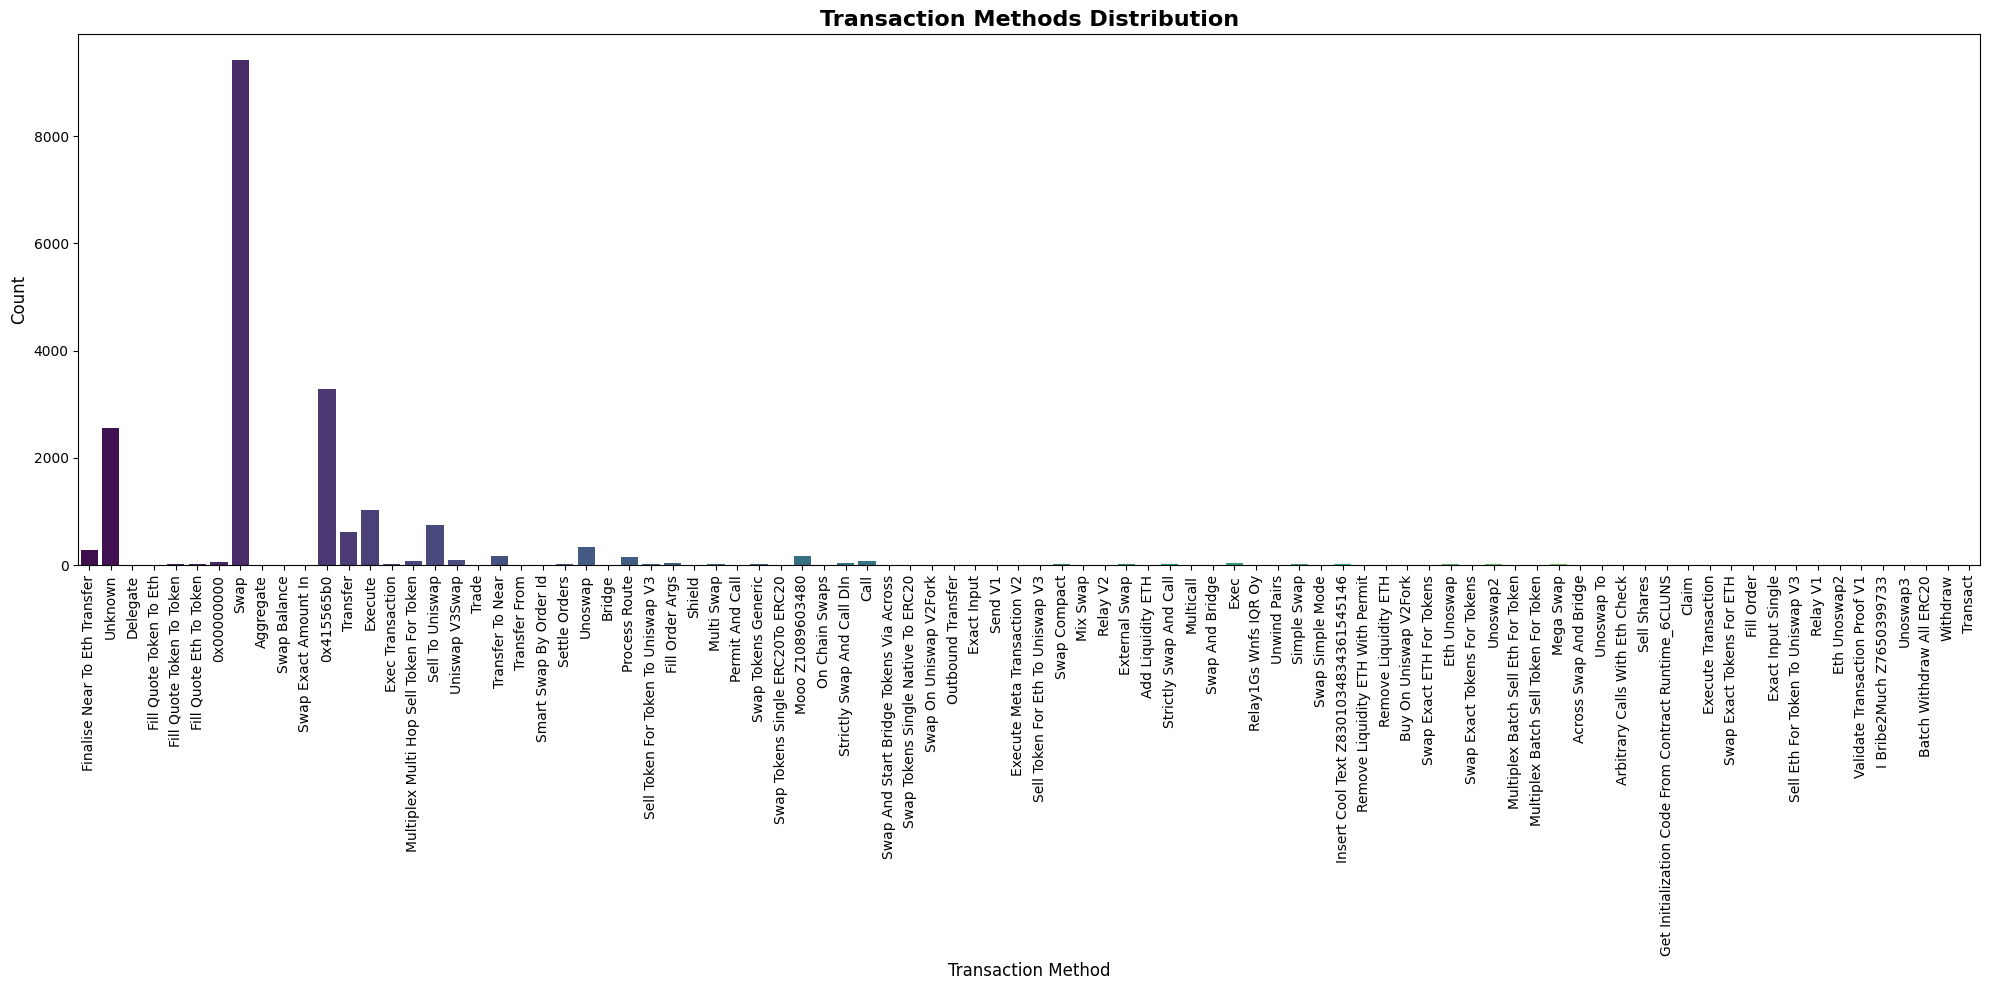

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Method', palette='viridis')
plt.title('Transaction Methods Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

 Analyze quantity distribution

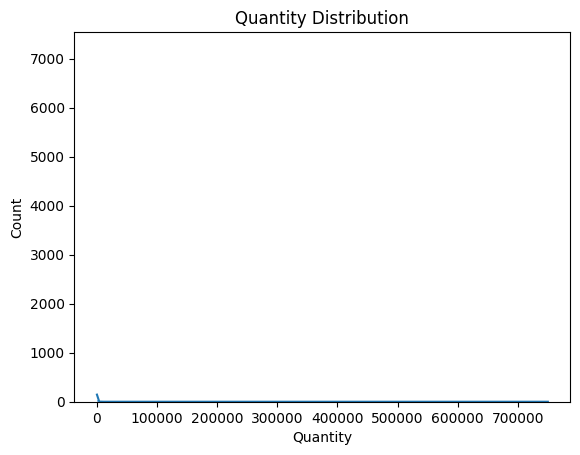

In [ ]:
sns.histplot(data=data, x='Quantity', kde=True)
plt.title('Quantity Distribution')
plt.show()

Correlation matrix

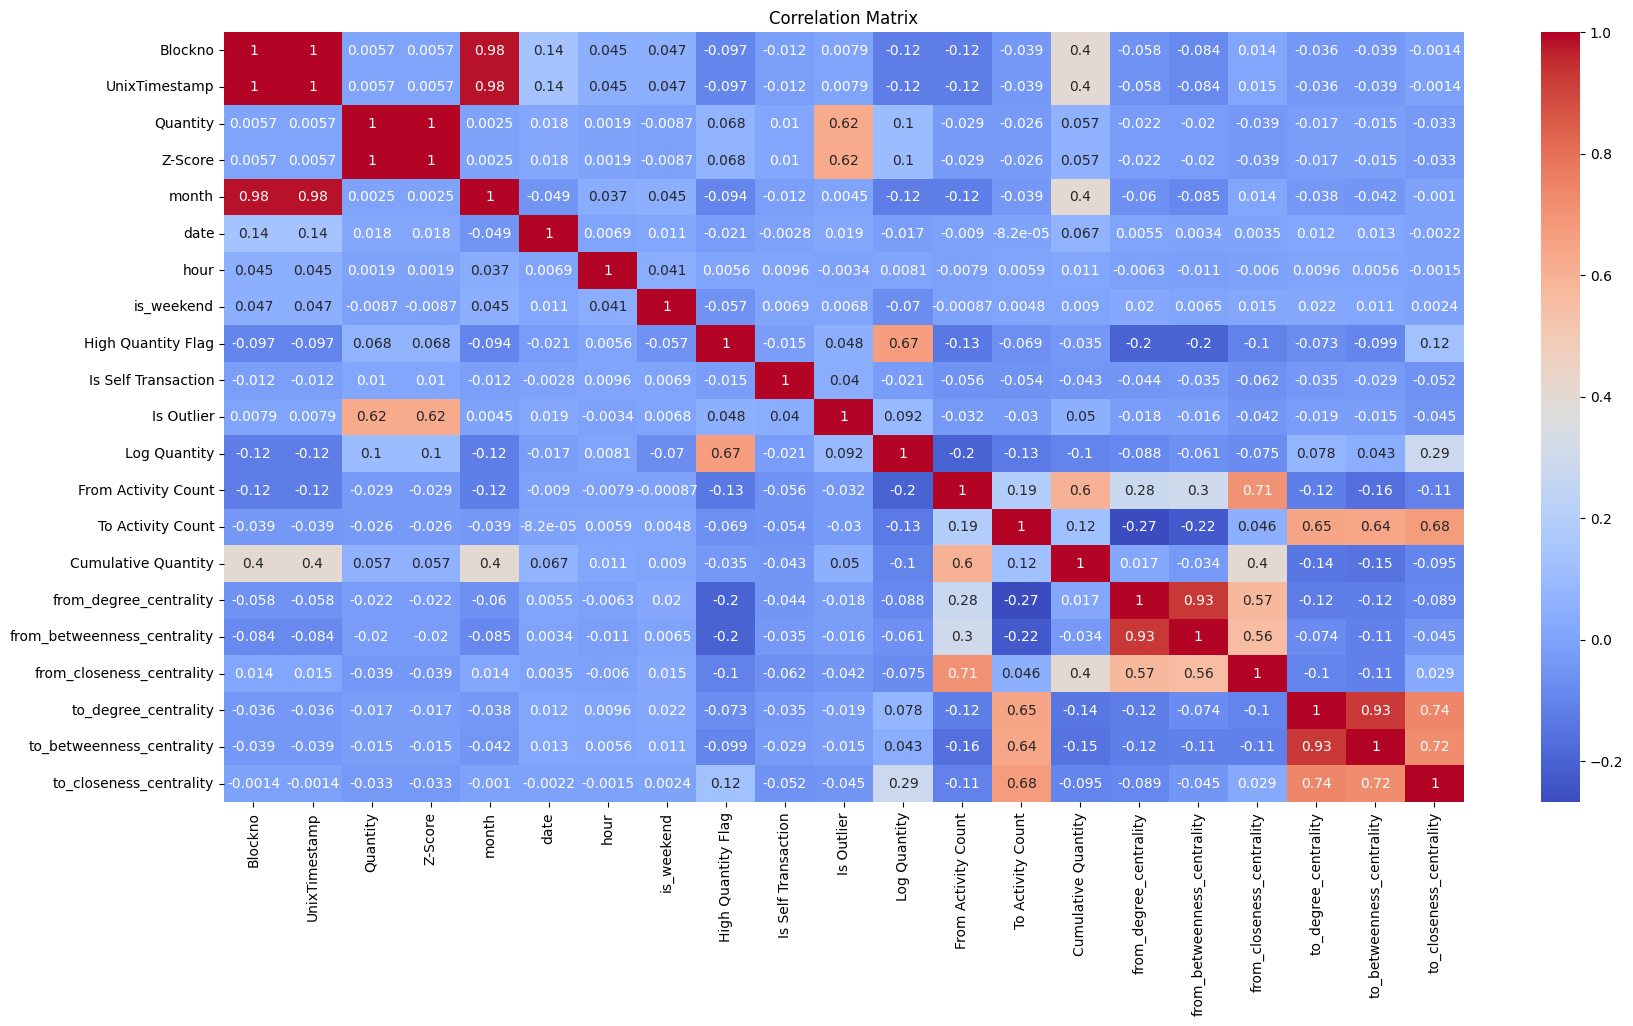

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Analyze Z-Score for outliers

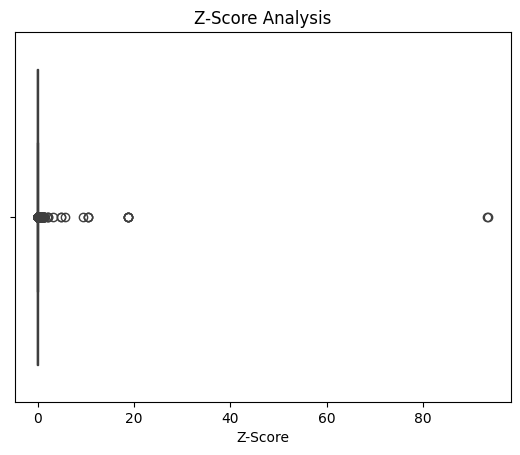

In [ ]:
sns.boxplot(data=data, x='Z-Score')
plt.title('Z-Score Analysis')
plt.show()

Group transactions by month , day and hour

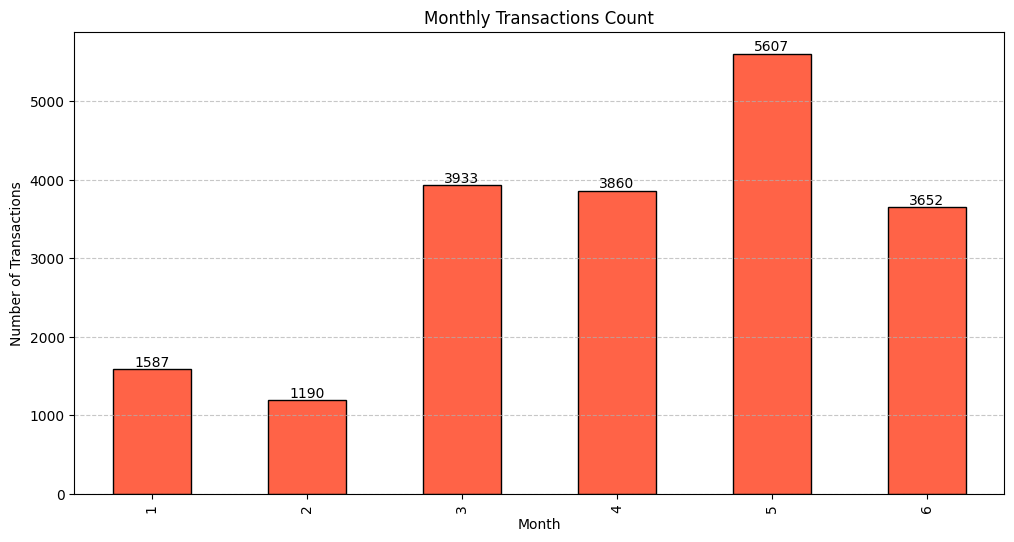

In [ ]:
plt.figure(figsize = (12,6))
monthly_transactions = data.groupby('month')['Transaction Hash'].count()
monthly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Monthly Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(monthly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Month')
plt.show()

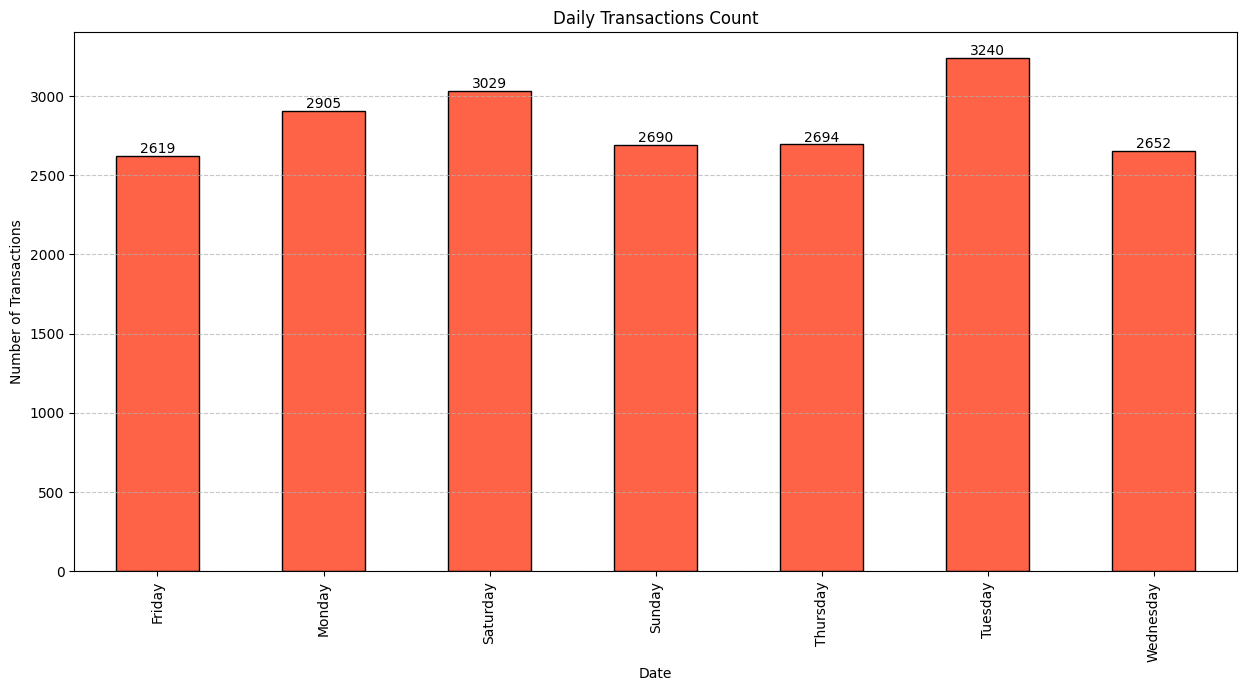

In [ ]:
plt.figure(figsize = (15,7))
daily_transactions = data.groupby('day_of_week')['Transaction Hash'].count()
daily_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Daily Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(daily_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.show()

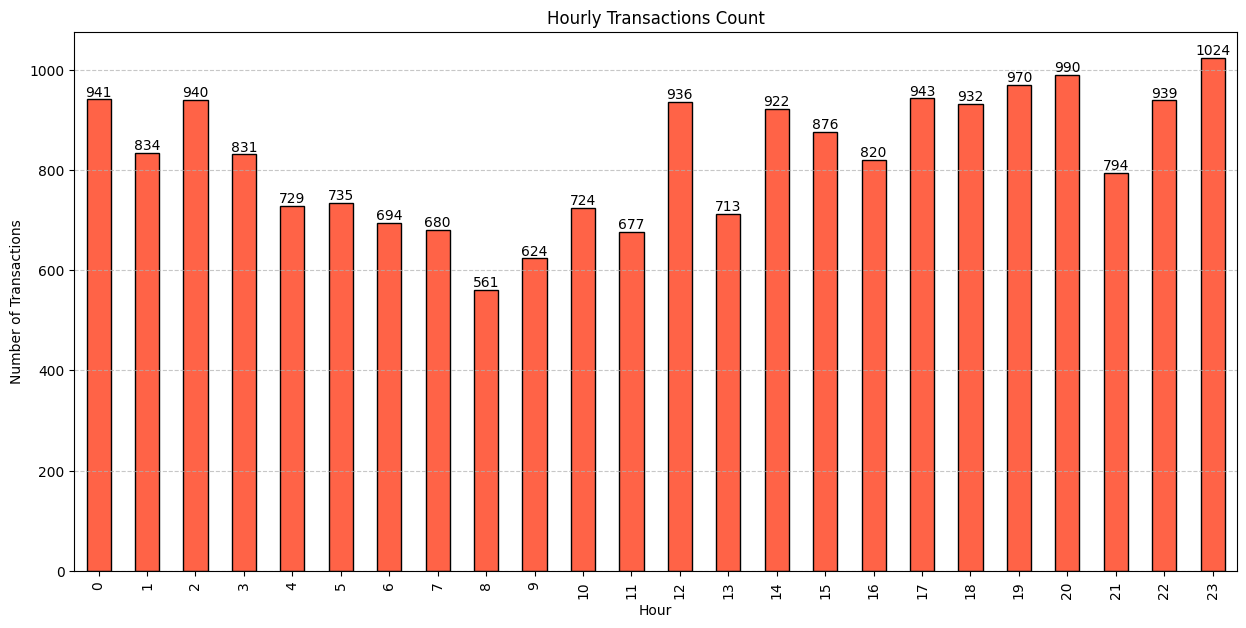

In [ ]:
plt.figure(figsize = (15,7))
hourly_transactions = data.groupby('hour')['Transaction Hash'].count()
hourly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Hourly Transactions Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')
for i, count in enumerate(hourly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weekend vs. Weekday transactions

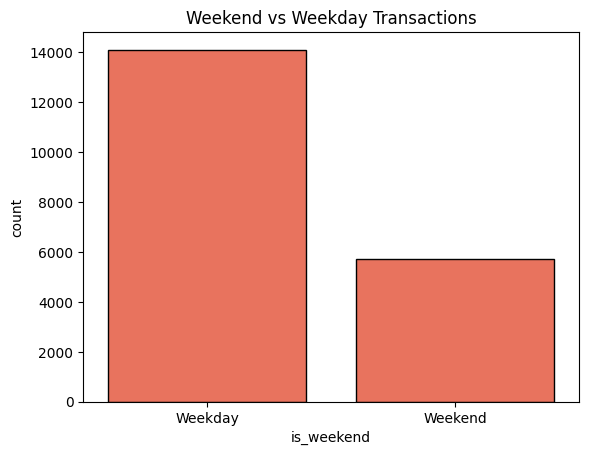

In [ ]:
sns.countplot(data=data, x='is_weekend' , color = "tomato" , edgecolor = "k")
plt.title('Weekend vs Weekday Transactions')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

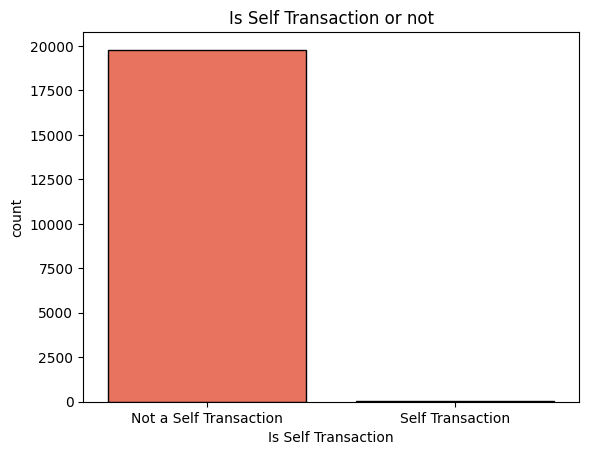

In [ ]:
sns.countplot(data=data, x='Is Self Transaction' , color = "tomato" , edgecolor = "k")
plt.title('Is Self Transaction or not')
plt.xticks([0, 1], ['Not a Self Transaction', 'Self Transaction'])
plt.show()

In [ ]:
#data.to_csv("processed_near_token_data.csv", index=False)
#this processed dataset in Group2/Dataset folder

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19829 entries, 13 to 10613
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19829 non-null  object        
 1   Blockno                      19829 non-null  int64         
 2   UnixTimestamp                19829 non-null  int64         
 3   DateTime (UTC)               19829 non-null  datetime64[ns]
 4   From                         19829 non-null  object        
 5   To                           19829 non-null  object        
 6   Quantity                     19829 non-null  float64       
 7   Method                       19829 non-null  object        
 8   Z-Score                      19829 non-null  float64       
 9   month                        19829 non-null  int32         
 10  date                         19829 non-null  int32         
 11  hour                         19829 non-null  

# **Sprint 2**

Convert Categorical Columns to Numerical

In [ ]:
# Transforming 'hour' and 'month' feature into sine and cosine representation to handle its cyclical nature
data["hour_sin"] = np.sin(2 * np.pi * data["hour"] / 24)
data["hour_cos"] = np.cos(2 * np.pi * data["hour"] / 24)
data["month_sin"] = np.sin(2 * np.pi * data["month"] / 12)
data["month_cos"] = np.cos(2 * np.pi * data["month"] / 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Converting Categorical column into binary
categorical_columns = ['is_weekend', 'High Quantity Flag', 'Is Self Transaction', 'Is Outlier']
for col in categorical_columns:
    data[col] = data[col].astype(int)

label_encoder = LabelEncoder()
categorical_to_encode = ['day_of_week', 'Method', 'Quantity Category']
for col in categorical_to_encode:
    data[col] = label_encoder.fit_transform(data[col])


Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity',
    'from_degree_centrality', 'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality',
    'date', 'month'
]

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
# Define the feature columns
features = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity','High Quantity Flag',
    'Is Self Transaction', 'Is Outlier','hour_sin',
    'hour_cos','month_sin','month_cos',
    'is_weekend','from_degree_centrality',
    'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality'
]

# Extract the features for modeling
X = data[features]

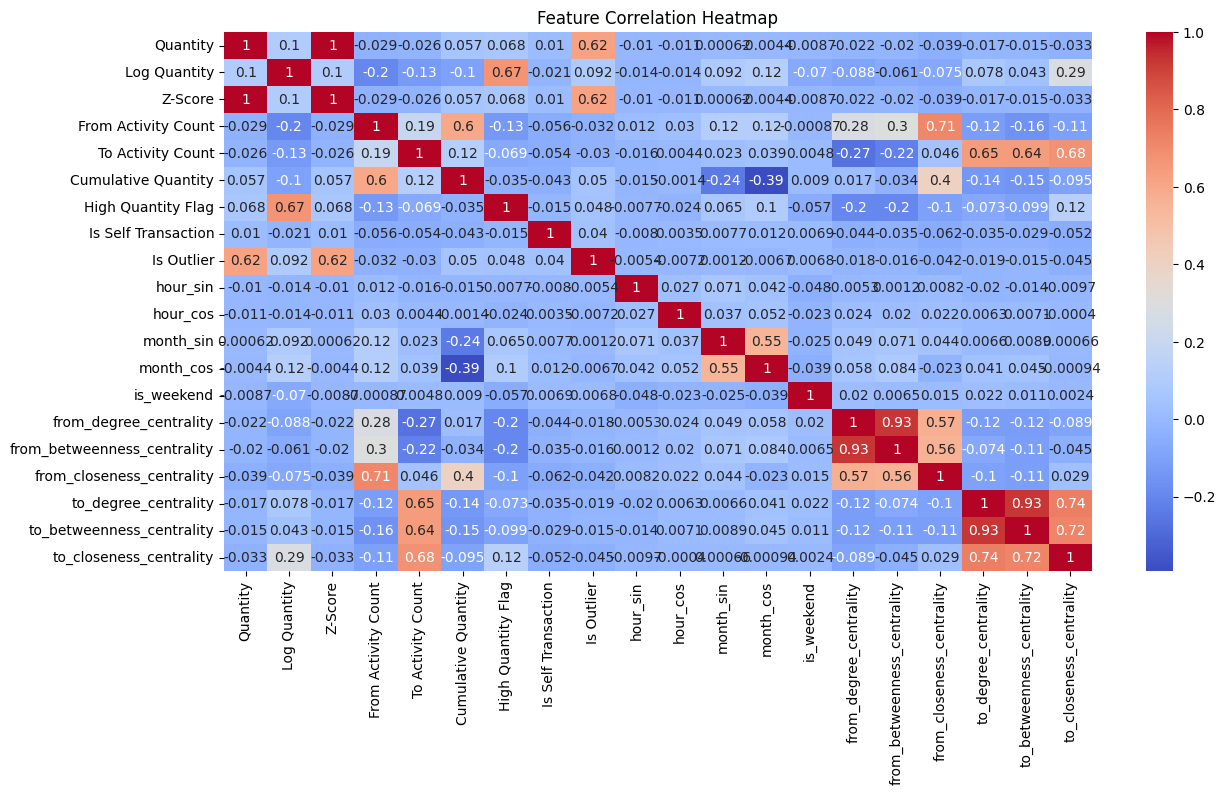

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## **Isolation forest for anomalies detection**





Train the Isolation Forest Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.05,
    random_state=42
)

# Fit the model on the dataset
iso_forest.fit(X_scaled)

# Predict anomalies (-1: anomaly, 1: normal)
data['isolation_anomaly'] = iso_forest.predict(X)


Visualize Anomalies

In [ ]:
#Anomaly Distribution
print(data['isolation_anomaly'].value_counts())


isolation_anomaly
 1    19174
-1      655
Name: count, dtype: int64


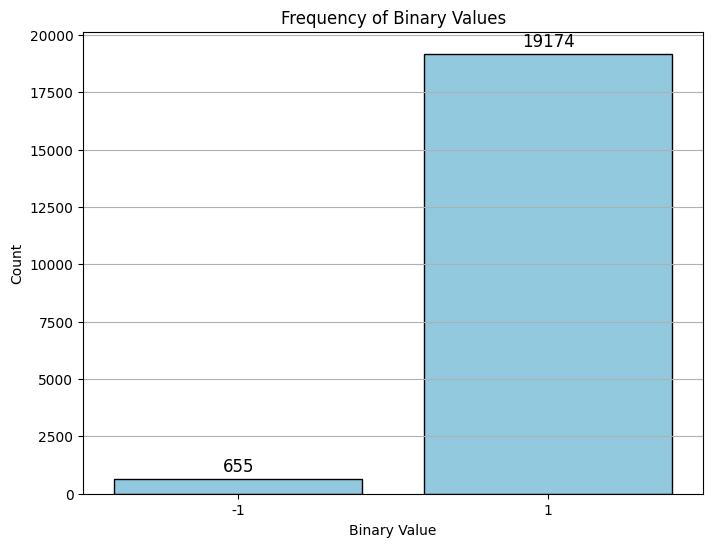

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='isolation_anomaly', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Get the count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position text in the middle of the bar
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


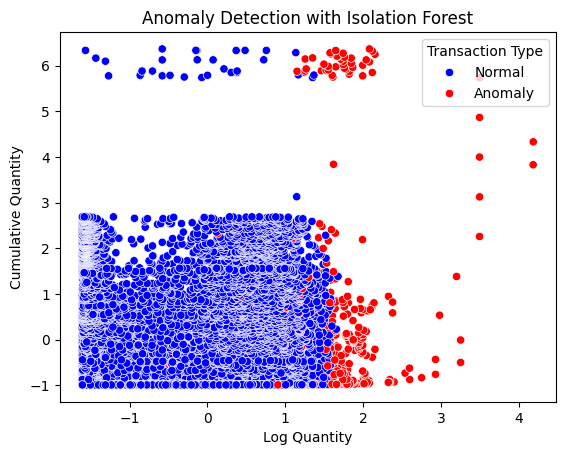

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot anomalies vs normal transactions
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['isolation_anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red']
)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.show()


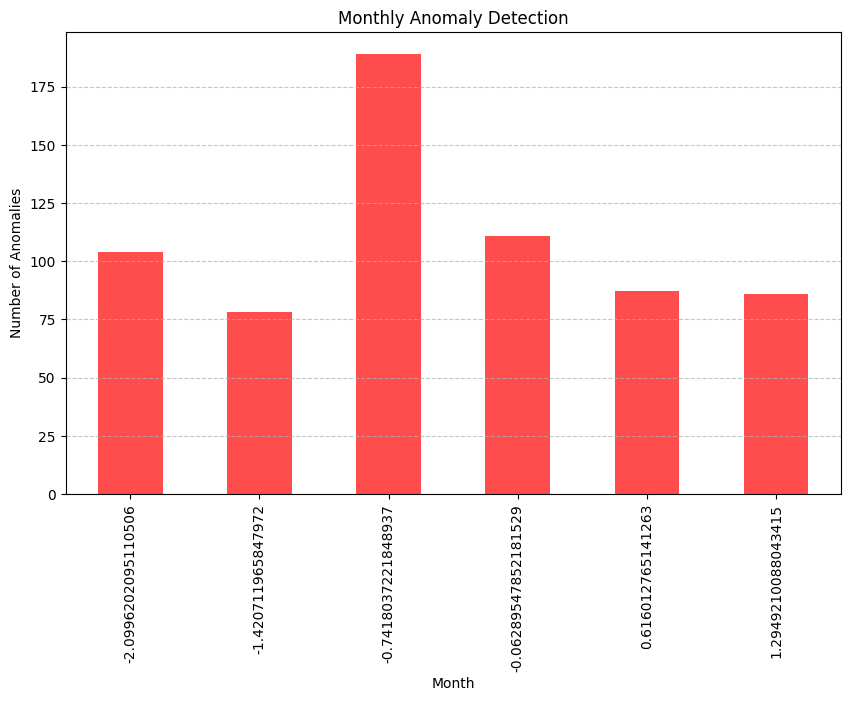

In [ ]:
import matplotlib.pyplot as plt

# Group by month and count anomalies
monthly_anomalies = data[data['isolation_anomaly'] == -1].groupby('month').size()

# Plot monthly anomalies
plt.figure(figsize=(10, 6))
monthly_anomalies.plot(kind='bar', color='red', alpha=0.7)
plt.title("Monthly Anomaly Detection")
plt.xlabel("Month")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


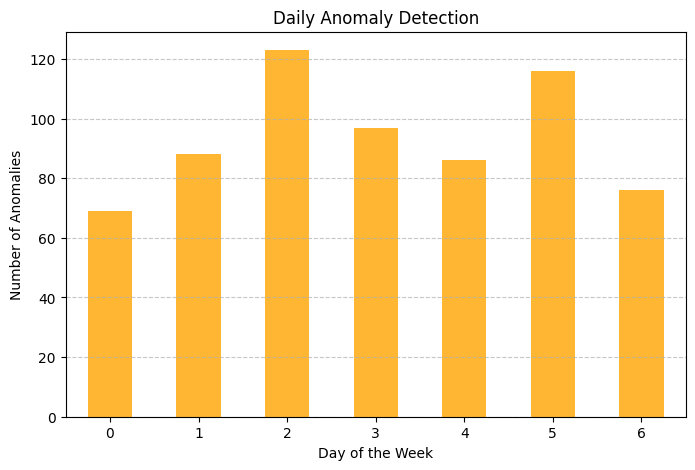

In [ ]:
# Group by day_of_week and count anomalies
daily_anomalies = data[data['isolation_anomaly'] == -1].groupby('day_of_week').size()

# Plot daily anomalies
plt.figure(figsize=(8, 5))
daily_anomalies.plot(kind='bar', color='orange', alpha=0.8)
plt.title("Daily Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


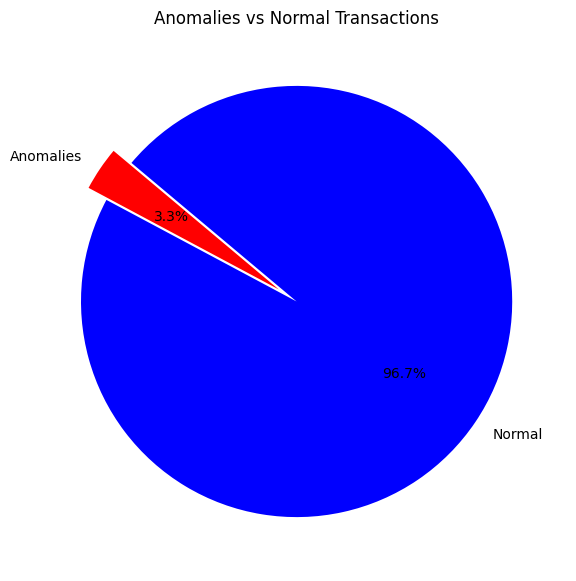

In [ ]:
# Calculate anomaly percentage
total_transactions = len(data)
anomaly_count = (data['isolation_anomaly'] == -1).sum()
normal_count = total_transactions - anomaly_count

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    [anomaly_count, normal_count],
    labels=['Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'blue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("Anomalies vs Normal Transactions")
plt.show()


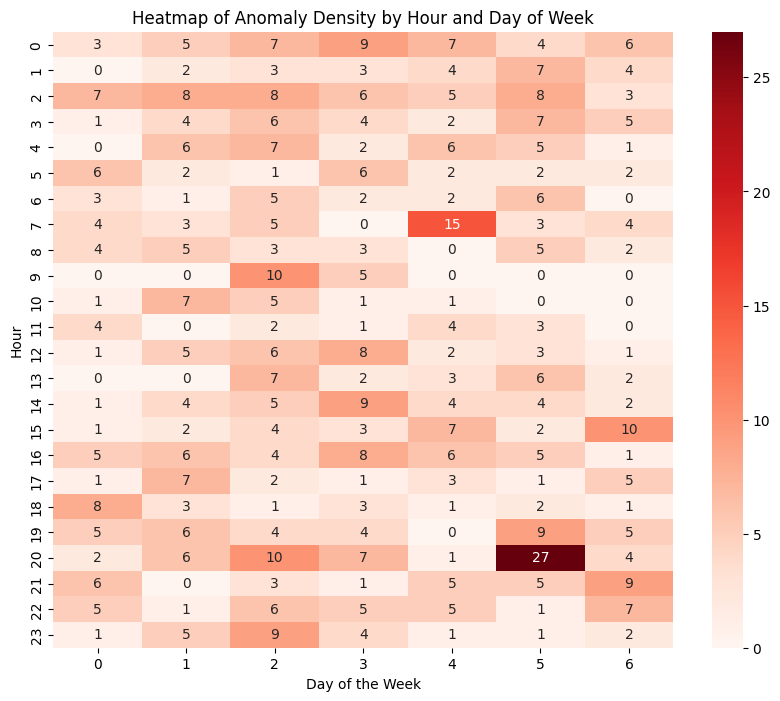

In [ ]:
import seaborn as sns

# Create a pivot table for heatmap
heatmap_data = data[data['isolation_anomaly'] == -1].pivot_table(
    index='hour', columns='day_of_week', values='isolation_anomaly', aggfunc='count', fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt='d')
plt.title("Heatmap of Anomaly Density by Hour and Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour")
plt.show()


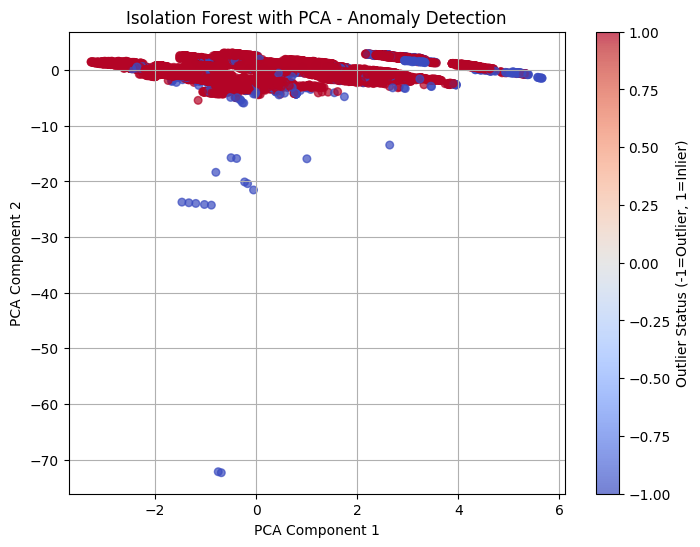

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA Algo to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['isolation_anomaly'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('Isolation Forest with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


# **Local Outlier Factor**

### Train LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors = 20 , metric = 'euclidean' , contamination = 0.02)

predictions = lof.fit_predict(X_scaled)

anomaly_scores = lof.negative_outlier_factor_

data['lof_scores'] = anomaly_scores
data['lof_outliers'] = predictions


In [ ]:
outlier_count = (data['lof_outliers'] == -1).sum()
print(f"Number of outliers detected: {outlier_count}")


Number of outliers detected: 397


### Visualize and Detecting Anomalies

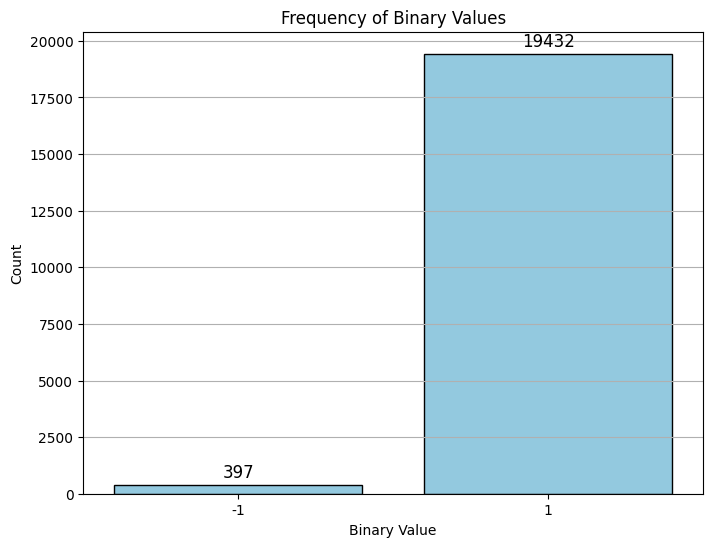

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='lof_outliers', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )
plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


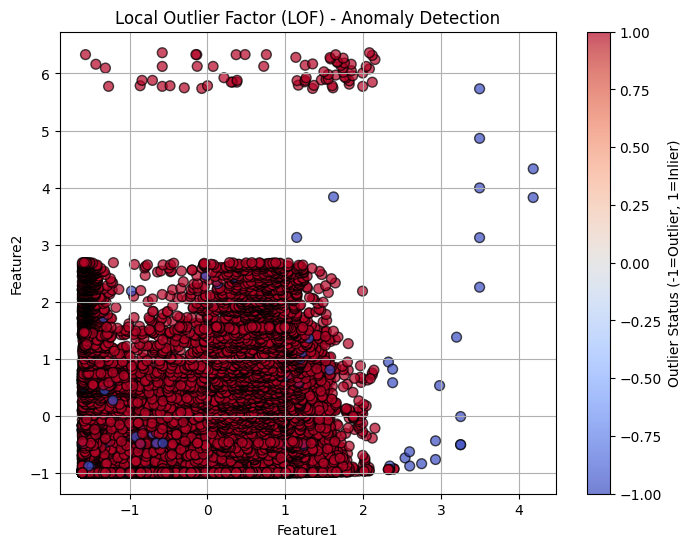

In [ ]:
plt.figure(figsize=(8, 6))

# Plot inliers (1) and outliers (-1) with different colors
plt.scatter(data['Log Quantity'], data['Cumulative Quantity'], c=data['lof_outliers'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title('Local Outlier Factor (LOF) - Anomaly Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Display the colorbar for outlier status
plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


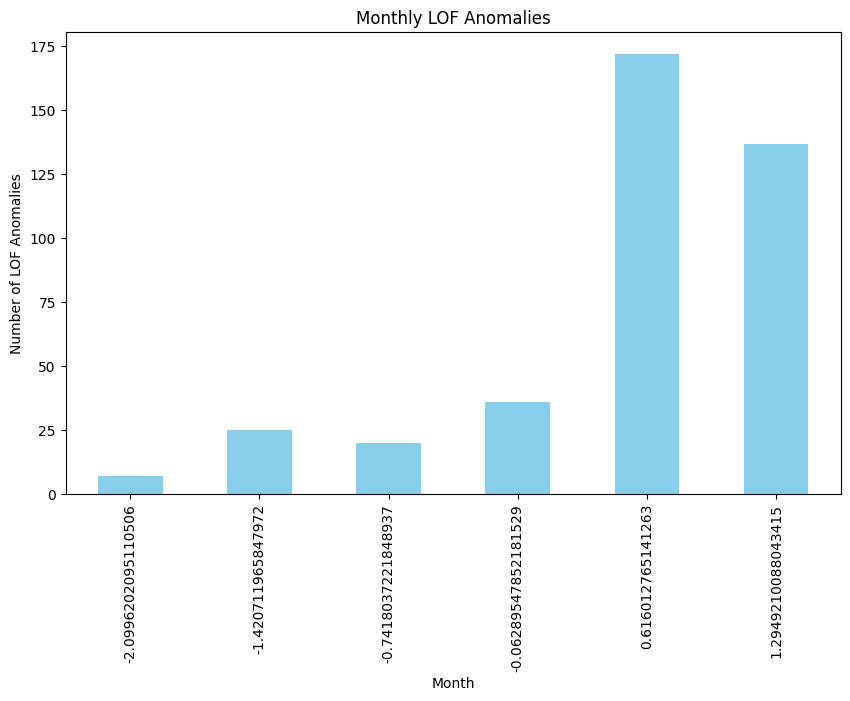

In [ ]:
 # Group by month and count LOF anomalies
monthly_lof_anomalies = data[data['lof_outliers'] == -1].groupby('month').size()

# Plot monthly LOF anomalies
plt.figure(figsize=(10, 6))
monthly_lof_anomalies.plot(kind='bar', color='skyblue')
plt.title("Monthly LOF Anomalies")
plt.xlabel("Month")
plt.ylabel("Number of LOF Anomalies")
plt.xticks(rotation=90)
plt.show()

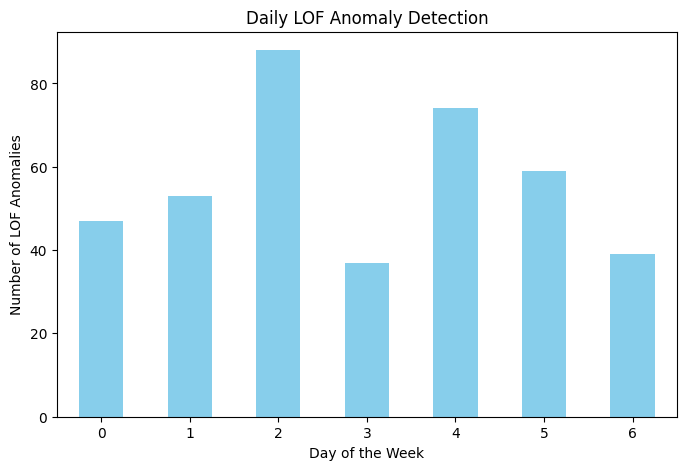

In [ ]:
# Group by day_of_week and count LOF anomalies
daily_lof_anomalies = data[data['lof_outliers'] == -1].groupby('day_of_week').size()

# Plot daily LOF anomalies
plt.figure(figsize=(8, 5))
daily_lof_anomalies.plot(kind='bar', color='skyblue')
plt.title("Daily LOF Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of LOF Anomalies")
plt.xticks(rotation=0)
plt.show()

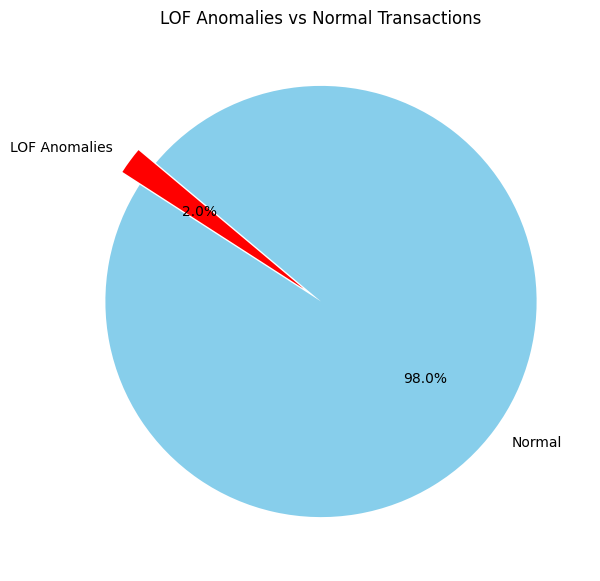

In [ ]:
# Calculate anomaly percentage for LOF
total_transactions = len(data)
lof_anomaly_count = (data['lof_outliers'] == -1).sum()
lof_normal_count = total_transactions - lof_anomaly_count

# Pie chart for LOF
plt.figure(figsize=(7, 7))
plt.pie(
    [lof_anomaly_count, lof_normal_count],
    labels=['LOF Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'skyblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("LOF Anomalies vs Normal Transactions")
plt.show()

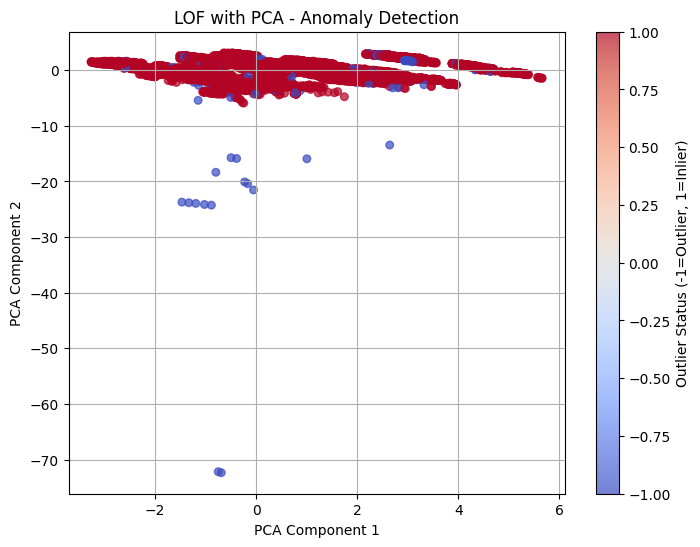

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['lof_outliers'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('LOF with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


# **One Class SVM**

### Train SVM

In [ ]:
from sklearn.svm import OneClassSVM

# Initialize and fit One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
ocsvm.fit(X_scaled)

data['ocsvm_anomaly'] = ocsvm.predict(X_scaled)

In [ ]:
# Add anomaly scores
anomaly_scores = ocsvm.decision_function(X_scaled)
data['ocsvm_scores'] = anomaly_scores

# Count anomalies
anomaly_count = (data['ocsvm_anomaly'] == -1).sum()
print(f"Number of anomalies detected: {anomaly_count}")


Number of anomalies detected: 993


### Visualize and Detecting Anomalies

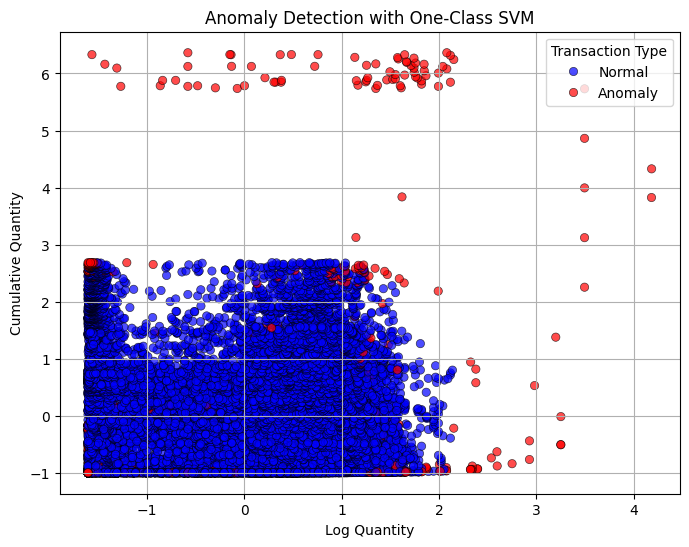

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['ocsvm_anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red'],
    edgecolor='k', alpha=0.7
)
plt.title("Anomaly Detection with One-Class SVM")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.grid(True)
plt.show()

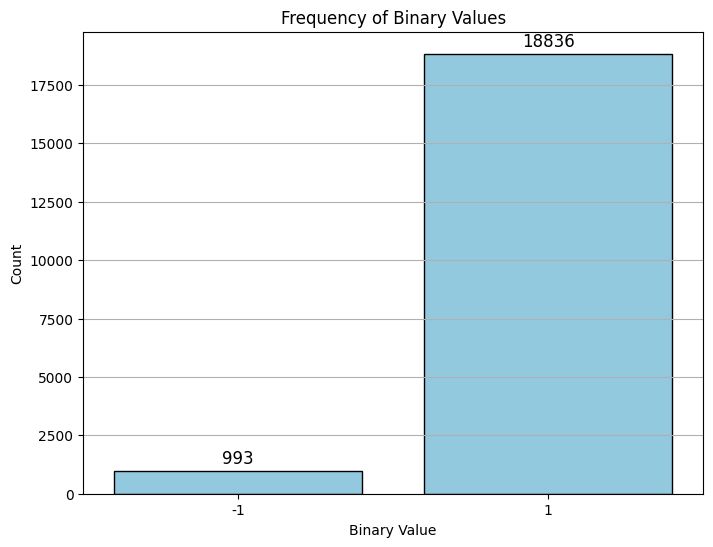

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='ocsvm_anomaly', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

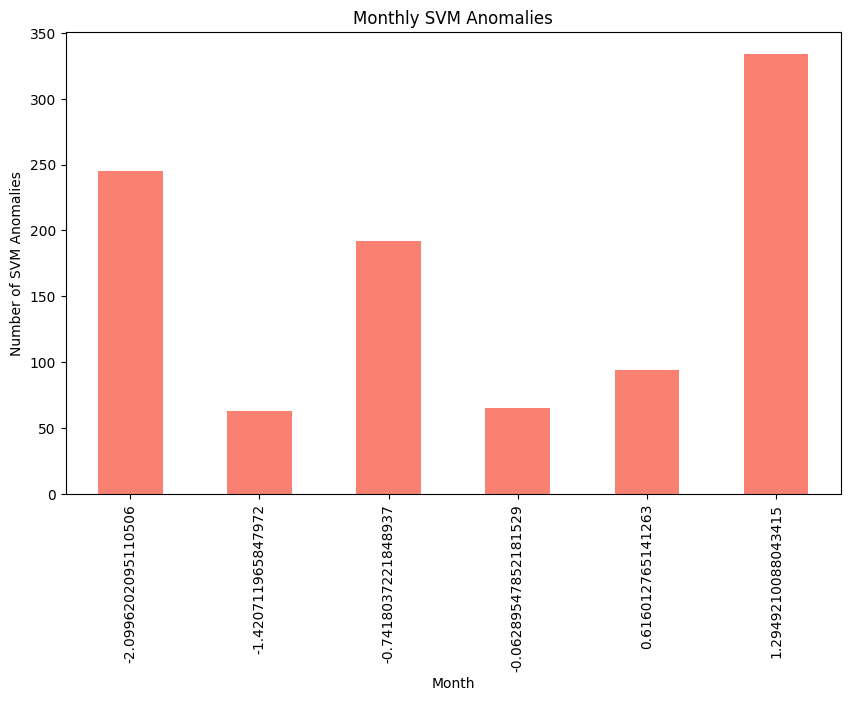

In [ ]:
# Group by month and count SVM anomalies
monthly_svm_anomalies = data[data['ocsvm_anomaly'] == -1].groupby('month').size()

# Plot monthly SVM anomalies
plt.figure(figsize=(10, 6))
monthly_svm_anomalies.plot(kind='bar', color='salmon')
plt.title("Monthly SVM Anomalies")
plt.xlabel("Month")
plt.ylabel("Number of SVM Anomalies")
plt.xticks(rotation=90)
plt.show()

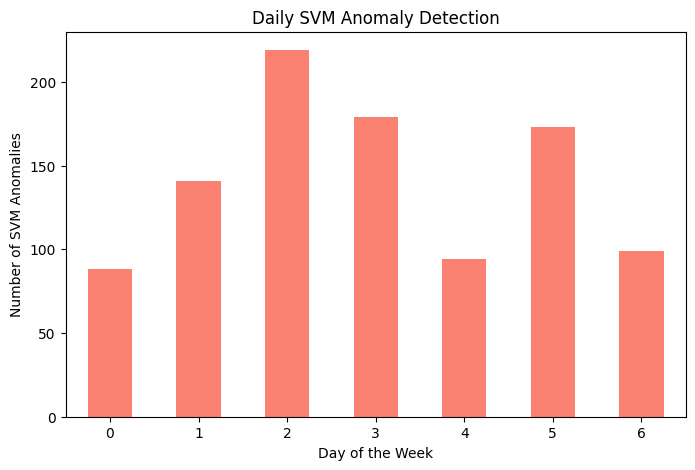

In [ ]:
# Group by day_of_week and count SVM anomalies
daily_svm_anomalies = data[data['ocsvm_anomaly'] == -1].groupby('day_of_week').size()

# Plot daily SVM anomalies
plt.figure(figsize=(8, 5))
daily_svm_anomalies.plot(kind='bar', color='salmon')
plt.title("Daily SVM Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of SVM Anomalies")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

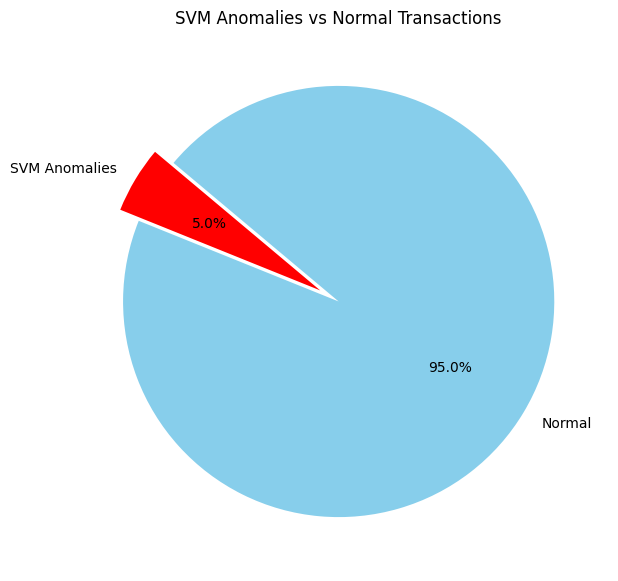

In [ ]:
# Calculate anomaly percentage for SVM
total_transactions = len(data)
svm_anomaly_count = (data['ocsvm_anomaly'] == -1).sum()
svm_normal_count = total_transactions - svm_anomaly_count

# Pie chart for SVM
plt.figure(figsize=(7, 7))
plt.pie(
    [svm_anomaly_count, svm_normal_count],
    labels=['SVM Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'skyblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("SVM Anomalies vs Normal Transactions")
plt.show()

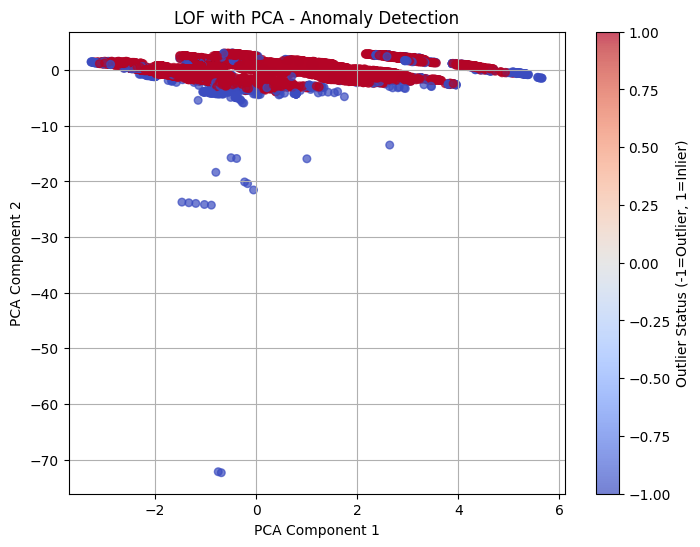

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['ocsvm_anomaly'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('LOF with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


# **Comparison between models in detecting Anomaly**

> Add blockquote




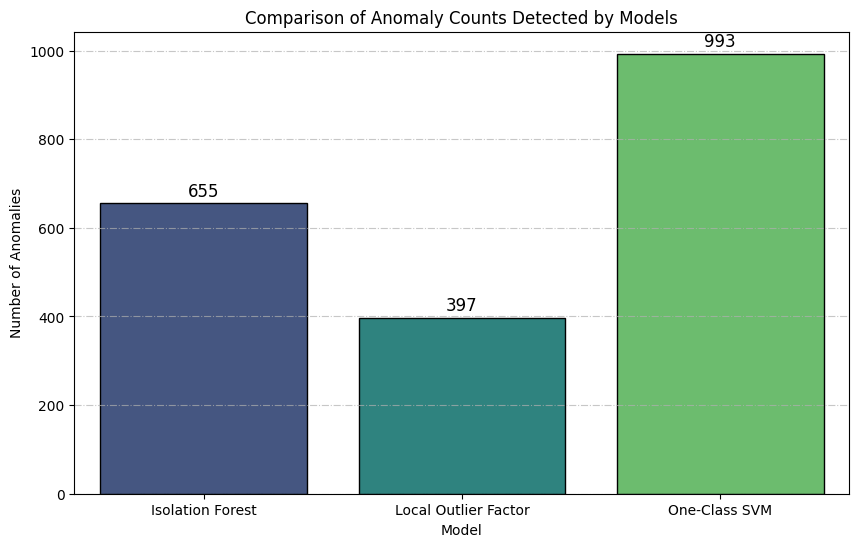

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate anomaly counts
anomaly_counts = pd.DataFrame({
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM'],
    'Anomalies': [
        (data['isolation_anomaly'] == -1).sum(),
        (data['lof_outliers'] == -1).sum(),
        (data['ocsvm_anomaly'] == -1).sum()
    ]
})

# Plot anomaly counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Anomalies', data=anomaly_counts, palette='viridis', edgecolor='k')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )


plt.title('Comparison of Anomaly Counts Detected by Models')
plt.ylabel('Number of Anomalies')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

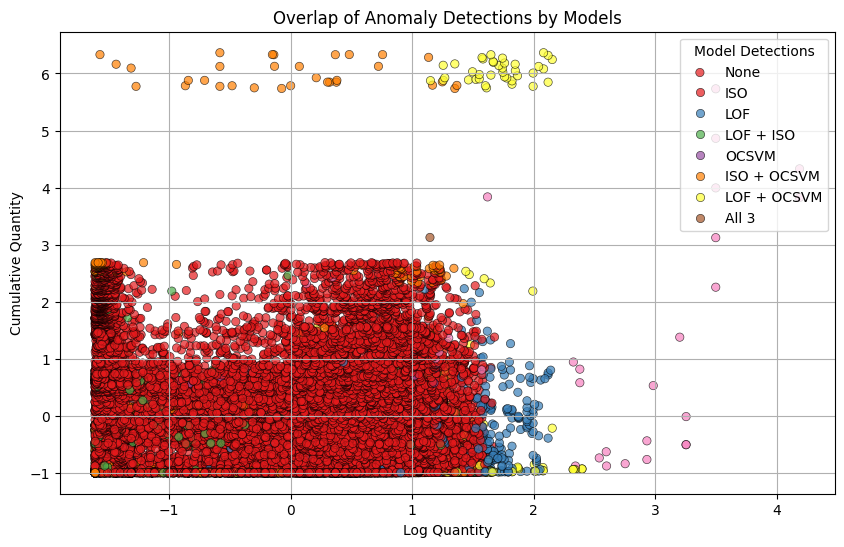

In [ ]:
# Visualize overlap between models
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=(data['isolation_anomaly'] == -1).astype(int) +  # Changed 'Anomaly' to 'isolation_anomaly'
         (data['lof_outliers'] == -1).astype(int) * 2 +
         (data['ocsvm_anomaly'] == -1).astype(int) * 4,
    palette='Set1', edgecolor='k', alpha=0.7
)
plt.title("Overlap of Anomaly Detections by Models")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(
    title="Model Detections",
    labels=[
        "None", "ISO", "LOF", "LOF + ISO",
        "OCSVM", "ISO + OCSVM", "LOF + OCSVM", "All 3"
    ],
    loc='upper right'
)
plt.grid(True)
plt.show()

## **Ensemble Voting**

### Applying Ensemble

In [ ]:
from scipy.stats import mode

# Here we are Converting labels to binary (1 for normal, 0 for anomaly)
models_labels = np.array([
    np.where(data['isolation_anomaly'] == 1, 1, 0),
    np.where(data['lof_outliers'] == 1, 1, 0),
    np.where(data['ocsvm_anomaly'] == 1, 1, 0)
])

# Ensemble voting
ensemble_labels = mode(models_labels, axis=0).mode.flatten()

data['ensemble_output'] = pd.DataFrame({
    'ensemble_labels': ensemble_labels
})

In [ ]:
# Calculate agreement scores
agreement_scores = np.mean(models_labels == ensemble_labels, axis=1)

# Model names for clarity
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']

# Print agreement scores
for model, score in zip(model_names, agreement_scores):
    print(f"{model} agreement with ensemble: {score:.2f}")


Isolation Forest agreement with ensemble: 0.98
Local Outlier Factor agreement with ensemble: 0.97
One-Class SVM agreement with ensemble: 0.97


Visualizing and Detecting Anomalies

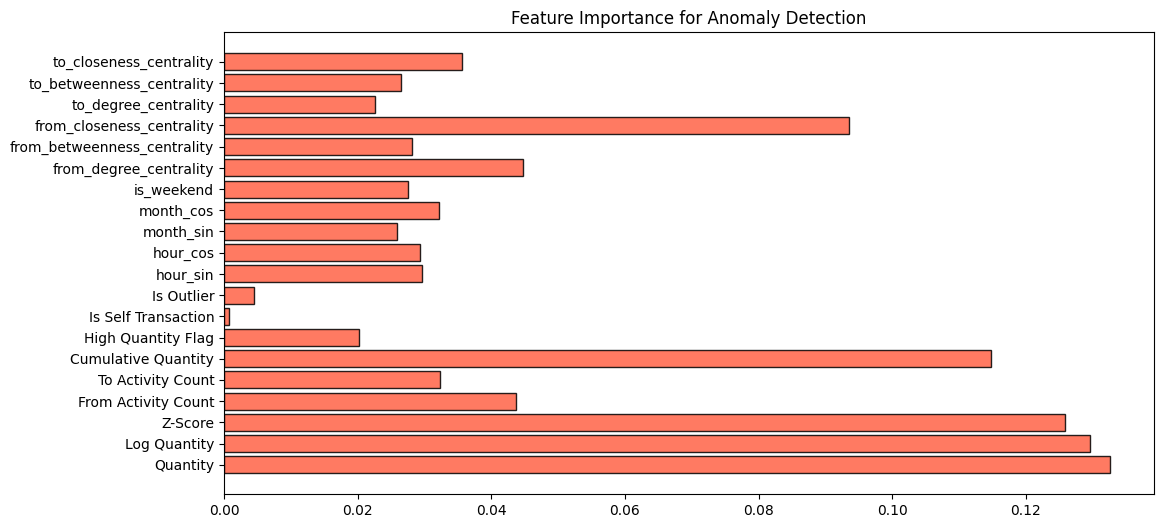

In [ ]:
## Visualizing the Feature Importance in Ensemble Voting

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(data[features], ensemble_labels)
importance = rf.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(features, importance , color = 'tomato' , alpha = 0.85 , edgecolor = 'k')
plt.title("Feature Importance for Anomaly Detection")
plt.show()


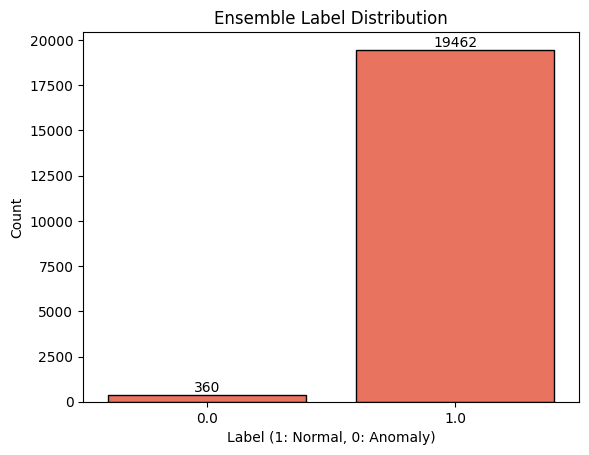

In [ ]:
## Countplot between Normal and Anomalous Data Points
sns.countplot(x=data['ensemble_output'] , color = 'tomato' , edgecolor = 'k')
plt.title("Ensemble Label Distribution")
plt.xlabel("Label (1: Normal, 0: Anomaly)")
plt.ylabel("Count")
for bar in plt.gca().patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, count + 0.1, str(count), ha='center', va='bottom' )

plt.show()


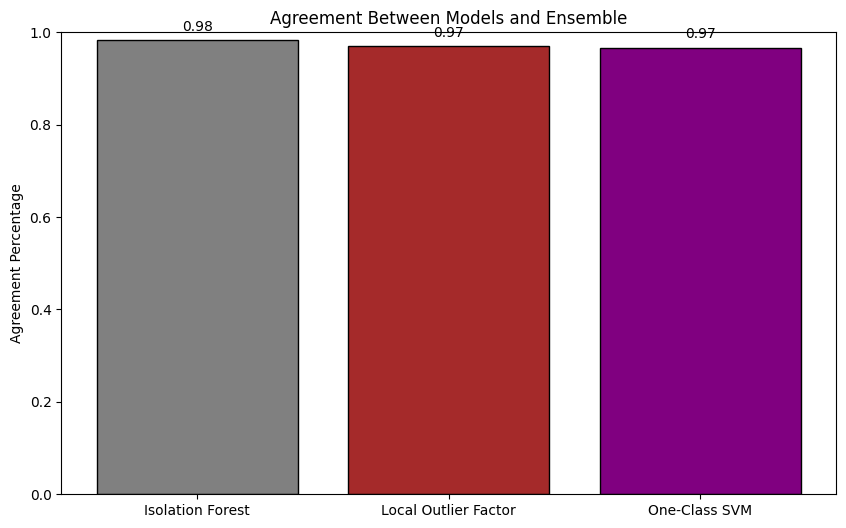

In [ ]:
agreement = np.mean(models_labels == ensemble_labels, axis=1)

plt.figure(figsize=(10, 6))
models = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']
plt.bar(models, agreement, color=['grey', 'brown', 'purple'] , edgecolor= 'k')
plt.title("Agreement Between Models and Ensemble")
plt.ylabel("Agreement Percentage")
plt.ylim(0, 1)
for i, value in enumerate(agreement):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.show()


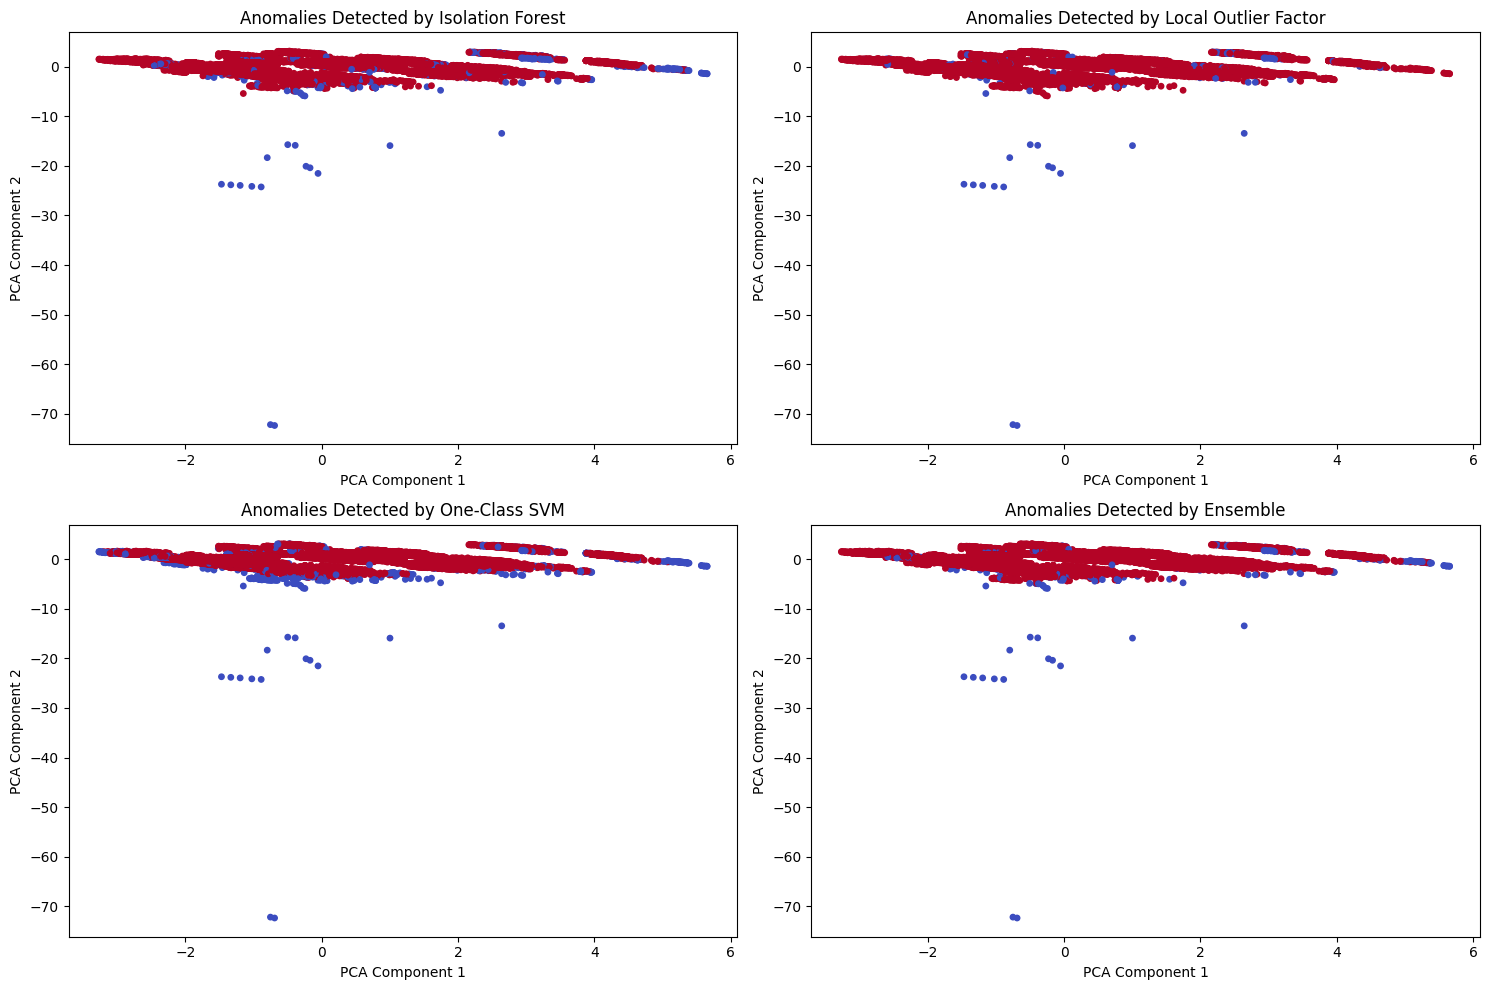

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot anomalies for each model and the ensemble
plt.figure(figsize=(15, 10))
models = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Ensemble']
for i, model_labels in enumerate(list(models_labels) + [ensemble_labels]):
    plt.subplot(2, 2, i + 1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model_labels, cmap='coolwarm', s=15)
    plt.title(f"Anomalies Detected by {models[i]}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


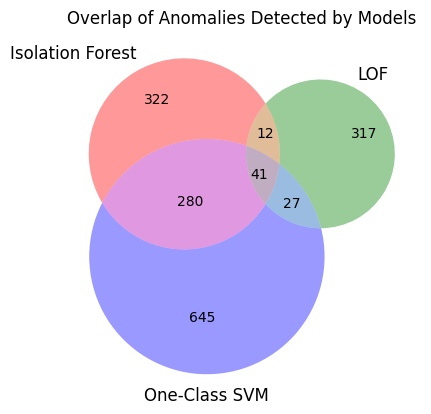

In [ ]:
from matplotlib_venn import venn3

# Convert model labels to binary sets for Venn diagram
if_anomalies = set(np.where(models_labels[0] == 0)[0])
lof_anomalies = set(np.where(models_labels[1] == 0)[0])
oc_anomalies = set(np.where(models_labels[2] == 0)[0])
ensemble_anomalies = set(np.where(ensemble_labels == 0)[0])

# Venn Diagram
venn3([if_anomalies, lof_anomalies, oc_anomalies], ('Isolation Forest', 'LOF', 'One-Class SVM'))
plt.title("Overlap of Anomalies Detected by Models")
plt.show()


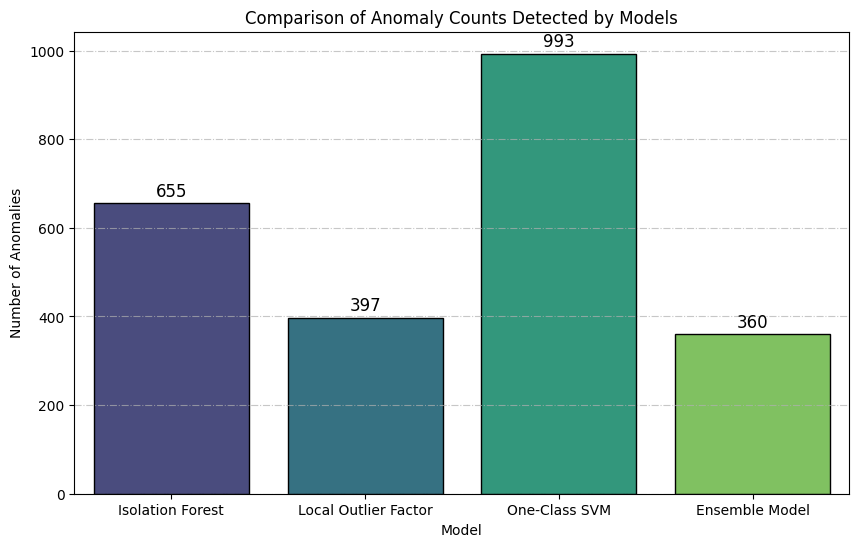

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate anomaly counts
anomaly_counts = pd.DataFrame({
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM',"Ensemble Model"],
    'Anomalies': [
        (data['isolation_anomaly'] == -1).sum(),  # Replace 'Anomaly' with 'isolation_anomaly'
        (data['lof_outliers'] == -1).sum(),
        (data['ocsvm_anomaly'] == -1).sum(),
        (data['ensemble_output'] == 0).sum()

    ]
})

# Plot anomaly counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Anomalies', data=anomaly_counts, palette='viridis', edgecolor='k')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )


plt.title('Comparison of Anomaly Counts Detected by Models')
plt.ylabel('Number of Anomalies')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

# **Sprint 3**


### **ARIMA**

In [ ]:
pip install statsmodels pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/NEAR_token_transaction_data.xlsx')

In [ ]:
df['Quantity'].dropna(inplace = True)
df["Quantity"].drop_duplicates(inplace = True)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime (UTC)'])
df.set_index('DateTime', inplace=True)
df = df.sort_index()


In [ ]:
df.head()

Transaction Hash  \
DateTime                                                                 
2024-01-01 00:25:35  0x27797428fc8aaf088cc707c8788b5d13580696418c79...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:36:11  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...   
2024-01-01 00:51:59  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...   

                      Blockno  UnixTimestamp      DateTime (UTC)  \
DateTime                                                           
2024-01-01 00:25:35  18909018     1704068735 2024-01-01 00:25:35   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:36:11  18909070     1704069371 2024-01-01 00:36:11   
2024-01-01 00:51:59  18909149     1704070319 2024-01-01 00:51:59   

                                                           From  \
DateTime                                                          
2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                                             To    Quantity  \
DateTime                                                                      
2024-01-01 00:25:35  0x776a0725094cbf984e31b43d17e8aaec3c88294a   36.593837   
2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18  104.984275   
2024-01-01 00:36:11  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.079035   
2024-01-01 00:36:11  0xd98d9d8c5a70df5d5d8e39847ce254347a59816b  104.984275   
2024-01-01 00:51:59  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   10.247435   

                              Method  
DateTime                              
2024-01-01 00:25:35  Sell To Uniswap  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:36:11       0x415565b0  
2024-01-01 00:51:59       0x415565b0

In [ ]:
target = df['Quantity'].resample('D').sum()

train_data = target[:-30]
test_data = target[-30:]

print(len(train_data))
print(len(test_data))

147
30


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train_data)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
  print("Reject the null hypothesis (H0). The time series is stationary.")
else:
  print("Fail to reject the null hypothesis (H0). The time series is not stationary.")

ADF Statistic: -4.43115581683401
p-value: 0.0002613314766798959
Reject the null hypothesis (H0). The time series is stationary.


In [ ]:
auto_model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3559.782, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3592.855, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3576.171, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3577.191, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3590.858, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3573.952, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3573.851, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3549.679, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3551.441, Time=0.49 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3555.235, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3552.967, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3555.207, Time=1.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3546.389, Time=0.82 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3550.840, Time=0.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3546.490, Time=1.38 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3547.482, Time=0.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3545.890, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3543.900, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3542.433, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3541.076, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3572.877, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=3542.605, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3571.955, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3544.093, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3549.764, Time=0.10 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 8.754 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1766.538
Date:                Tue, 14 Jan 2025   AIC                           3541.076
Time:                        17:10:28   BIC                           3553.010
Sample:                    01-01-2024   HQIC                          3545.925
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
m

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print(auto_model.order)   ## These parameters were yeilding poor result , so we use the (5,1,3) as parameters

(0, 1, 3)


In [ ]:
arima = ARIMA(train_data, order=(5,1,3))
model_fit = arima.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  147
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1765.273
Date:                Tue, 14 Jan 2025   AIC                           3548.547
Time:                        17:10:42   BIC                           3575.399
Sample:                    01-01-2024   HQIC                          3559.457
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8637      1.135      0.761      0.447      -1.361       3.088
ar.L2         -0.6580      1.030     -0.639      0.523      -2.676       1.360
ar.L3         -0.1207      0.413     -0.292      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = model_fit.forecast(steps=len(test_data))
print(forecast)

2024-05-27      410.998569
2024-05-28    22892.257943
2024-05-29    77022.569428
2024-05-30    92589.573648
2024-05-31    66585.859330
2024-06-01    43526.667361
2024-06-02    58998.871740
2024-06-03    82869.753307
2024-06-04    78882.837360
2024-06-05    53966.072675
2024-06-06    46362.635270
2024-06-07    63974.637745
2024-06-08    78427.673506
2024-06-09    69146.308951
2024-06-10    52871.872187
2024-06-11    53993.400139
2024-06-12    68859.894820
2024-06-13    74246.136808
2024-06-14    63640.407830
2024-06-15    54336.285691
2024-06-16    59606.406466
2024-06-17    69962.176033
2024-06-18    69818.565932
2024-06-19    60703.538754
2024-06-20    56917.444212
2024-06-21    63241.997683
2024-06-22    69270.356242
2024-06-23    66339.062738
2024-06-24    59819.790023
2024-06-25    59575.255496
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
forecast.shape

(30,)

In [ ]:
#Bollinger Bands
rolling_mean = target.rolling(window=20).mean()
rolling_std = target.rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

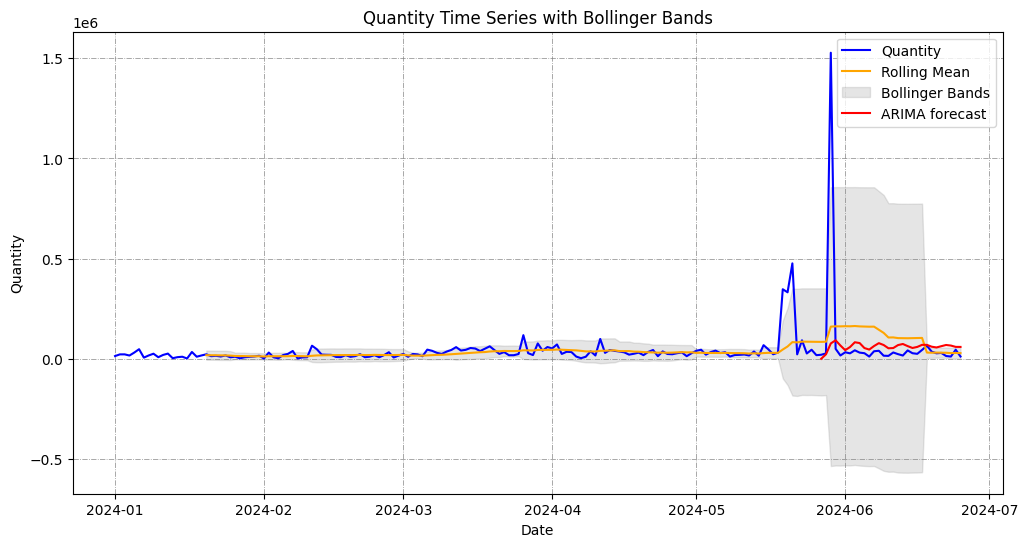

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(target, label = 'Quantity', color = 'blue')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'orange')
plt.fill_between(target.index, upper_band, lower_band, color = 'grey', alpha = 0.2,label='Bollinger Bands')
plt.plot(forecast, label = 'ARIMA forecast', color = 'red')
plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)
plt.show()

### Mann-Whitney U test

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

date = '2024-03-29'


till_29_march = df[df['DateTime (UTC)'] < date]['Quantity']
after_29_march = df[df['DateTime (UTC)'] >= date]['Quantity']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(till_29_march,after_29_march,alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - There is a significant difference in transaction volumes")
else:
    print("Fail to reject null hypothesis - No significant difference in transaction volumes")

Mann-Whitney U statistic: 49655494.0
p-value: 7.862244980785988e-73
Reject null hypothesis - There is a significant difference in transaction volumes


# **LSTM**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_excel("/content/NEAR_token_transaction_data.xlsx")

# Convert 'DateTime (UTC)' to datetime and set as index
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])
data.set_index('DateTime (UTC)', inplace=True)


In [ ]:
# Normalize the 'Quantity' column
scaler = MinMaxScaler()
data['Quantity_scaled'] = scaler.fit_transform(data[['Quantity']])

In [ ]:
# Create sequences for LSTM input
sequence_length = 30

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(data['Quantity_scaled'].values, sequence_length)


In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse') #Define the LSTM model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) #Train the model

Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 1.0766e-04 - val_loss: 2.9503e-07
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.2236e-04 - val_loss: 3.3956e-07
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 2.9016e-05 - val_loss: 1.5021e-06
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 7.5280e-05 - val_loss: 2.9341e-07
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.4131e-04 - val_loss: 2.9572e-07
Epoch 6/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 2.3047e-04 - val_loss: 7.1502e-07
Epoch 7/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.9344e-04 - val_loss: 2.9234e-07
Epoch 8/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.6141e-04 - val_loss: 2.9023e-07
Epoch 9/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5.9171e-05 - val_loss: 1.2658e-06
Epoch 10/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.7180e-05 - val_loss: 5.2258e-07


In [ ]:
#Make predictions and calculate reconstruction error
y_pred = model.predict(X)
data['Reconstruction_Error'] = np.nan
data.iloc[sequence_length:, data.columns.get_loc('Reconstruction_Error')] = np.abs(y - y_pred.flatten())

619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [ ]:
#Identify anomalies
threshold = data['Reconstruction_Error'].mean() + 2 * data['Reconstruction_Error'].std()
data['Anomaly'] = (data['Reconstruction_Error'] > threshold).astype(int)

**Mann-Whitney U Test**

In [ ]:
#Separate groups for Mann-Whitney U Test
group_normal = data[data['Anomaly'] == 0]['Reconstruction_Error']
group_anomalous = data[data['Anomaly'] == 1]['Reconstruction_Error']

In [ ]:
print(f"Group Normal Size: {len(group_normal)}")
print(f"Group Anomalous Size: {len(group_anomalous)}")


Group Normal Size: 19813
Group Anomalous Size: 23


In [ ]:
print(data['Reconstruction_Error'].describe())


count    1.980600e+04
mean     8.009791e-04
std      9.718204e-03
min      2.343143e-08
25%      4.668706e-04
50%      6.731345e-04
75%      7.391627e-04
max      9.992289e-01
Name: Reconstruction_Error, dtype: float64


In [ ]:
print(group_normal.isna().sum())
print(group_anomalous.isna().sum())


30
0


In [ ]:
group_normal = group_normal.dropna()

In [ ]:
data = data.reset_index(drop=True)


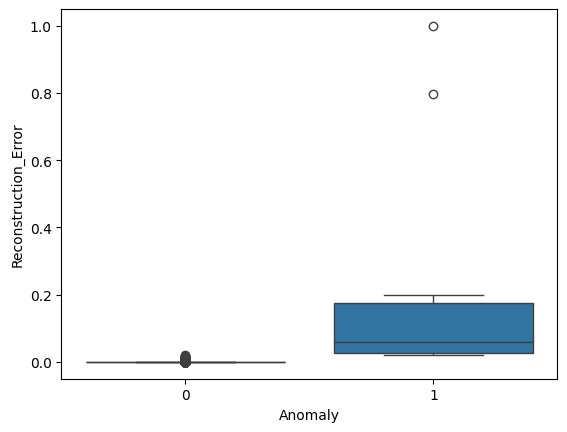

In [ ]:
sns.boxplot(x=data['Anomaly'], y=data['Reconstruction_Error'])
plt.show()

In [ ]:
statistic, p_value = mannwhitneyu(group_normal, group_anomalous, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U Test Statistic: 0.0
P-value: 1.0274300840161698e-16


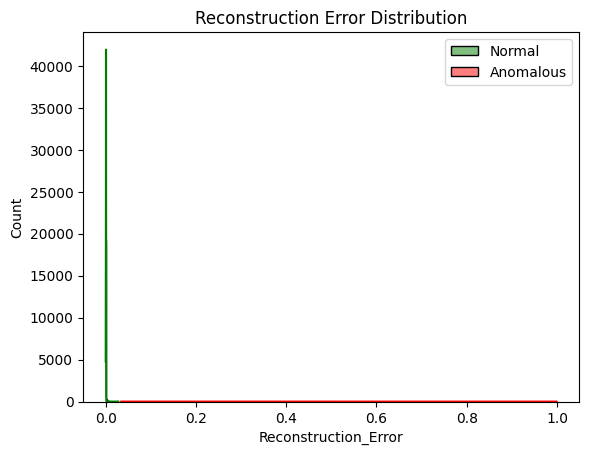

In [ ]:
import seaborn as sns
sns.histplot(group_normal, label="Normal", color="green", kde=True, bins=30)
sns.histplot(group_anomalous, label="Anomalous", color="red", kde=True, bins=30)
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [ ]:
print(f"Anomaly Threshold: {threshold}")
print(f"Number of Normal Transactions: {len(group_normal)}")
print(f"Number of Anomalous Transactions: {len(group_anomalous)}")

Anomaly Threshold: 0.029955591475526663
Number of Normal Transactions: 19820
Number of Anomalous Transactions: 16
